In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interp
import numbers
from scipy import stats
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.utils.multiclass import type_of_target
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from typing import Tuple
import sys
import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [27]:
data=pd.read_excel("C:/Users/LENOVO/OneDrive/Dokumen/ta/FILE COVID UPDATE TERBARU - Copy.xlsx")

In [35]:
data

Tingkat Keparahan  Usia Jenis Kelamin Diabetes Melitus Hipertensi  \
0           Meninggal  38.0     Laki-laki            Tidak      Tidak   
1           Meninggal  65.0     Perempuan               Ya         Ya   
2       Risiko Rendah  57.0     Laki-laki            Tidak      Tidak   
3       Risiko Rendah  23.0     Laki-laki            Tidak      Tidak   
4       Risiko Rendah  68.0     Laki-laki            Tidak      Tidak   
..                ...   ...           ...              ...        ...   
663     Risiko Rendah   1.0     Laki-laki              NaN        NaN   
664     Risiko Rendah  24.0     Perempuan              NaN        NaN   
665     Risiko Rendah  23.0     Laki-laki              NaN        NaN   
666     Risiko Rendah   1.0     Laki-laki              NaN        NaN   
667     Risiko Rendah  29.0     Laki-laki            Tidak      Tidak   

    Gagal Ginjal Kronis Penyakit Jantung  Sesak    RR  SpO2  Batuk  \
0                 Tidak            Tidak     Ya  28.0  89.0     Ya   
1                 Tidak            Tidak  Tidak  30.0  96.0  Tidak   
2                 Tidak               Ya  Tidak  24.0  97.0  Tidak   
3                 Tidak            Tidak  Tidak  21.0  96.5     Ya   
4                 Tidak            Tidak  Tidak  20.0  98.0  Tidak   
..                  ...              ...    ...   ...   ...    ...   
663                 NaN              NaN  Tidak   NaN   NaN  Tidak   
664                 NaN              NaN  Tidak   NaN   NaN     Ya   
665                 NaN              NaN  Tidak   NaN  99.0  Tidak   
666                 NaN              NaN    NaN  30.0  95.0    NaN   
667                 NaN              NaN    NaN   NaN   NaN    NaN   

     Tekanan Darah Atas  Suhu   Nadi  Pilek Anosmia  
0                 130.0  37.0   96.0     Ya   Tidak  
1                 107.0  38.0  110.0  Tidak   Tidak  
2                 137.0  35.7  125.0  Tidak   Tidak  
3                 108.0  37.0  140.0  Tidak   Tidak  
4                 131.0  36.0   72.0  Tidak   Tidak  
..                  ...   ...    ...    ...     ...  
663                 NaN   NaN    NaN  Tidak     NaN  
664                 NaN  37.9    NaN    NaN     NaN  
665                 NaN   NaN    NaN    NaN     NaN  
666                 NaN  36.7    NaN    NaN     NaN  
667                 NaN   NaN    NaN    NaN     NaN  

[668 rows x 16 columns]

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tingkat Keparahan    668 non-null    object 
 1   Usia                 666 non-null    float64
 2   Jenis Kelamin        668 non-null    object 
 3   Diabetes Melitus     545 non-null    object 
 4   Hipertensi           529 non-null    object 
 5   Gagal Ginjal Kronis  405 non-null    object 
 6   Penyakit Jantung     441 non-null    object 
 7   Sesak                652 non-null    object 
 8   RR                   639 non-null    float64
 9   SpO2                 643 non-null    float64
 10  Batuk                659 non-null    object 
 11  Tekanan Darah Atas   626 non-null    float64
 12  Suhu                 628 non-null    float64
 13  Nadi                 638 non-null    float64
 14  Pilek                463 non-null    object 
 15  Anosmia              277 non-null    obj

In [8]:
def hamming_distance(vector1, vector2):
    return np.count_nonzero(vector1 != vector2)
def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

In [9]:
cat_data=data.drop(['Usia','RR','SpO2','Tekanan Darah Atas','Suhu','Nadi'],axis=1)
for i in range(cat_data.shape[1]):
    for j in range(cat_data.shape[0]):
        if np.isnan(cat_data.iloc[j,i]) == False:
            cat_data.iloc[j,i] = str(cat_data.iloc[j,i])
num_data=data[['Usia','RR','SpO2','Tekanan Darah Atas','Suhu','Nadi']]
data=pd.concat([num_data,cat_data],axis=1)

In [10]:
for i in range(data.shape[1]):
    if data.columns[i] in data.select_dtypes(include=['int64', 'float64']).columns.tolist():
        data_numeric = num_data.drop(data.columns[i],axis=1)
        data_categorical = pd.DataFrame([cat_data[x].fillna(cat_data[x].mode()[0]) for x in cat_data.columns]).T
        data_numeric.fillna(data_numeric.mean(), inplace=True)
        for j in range(data.shape[0]):
            if np.isnan(data.iloc[j,i]):
                numbers = [number for number in range(668) if number != j]
                dist_cat = [hamming_distance(data_categorical.iloc[j,:],data_categorical.iloc[a,:])  for a in numbers]
                dist_num = [euclidean_distance(data_numeric.iloc[j,:],data_numeric.iloc[a,:])  for a in numbers]
                dist_cat = (dist_cat - np.mean(dist_cat))/np.std(dist_cat)
                dist_num = (dist_num - np.mean(dist_num))/np.std(dist_num)
                nearest_neighbors = np.argsort(dist_cat+dist_num)
                nearest_value = []
                for k in nearest_neighbors:
                    if np.isnan(data.iloc[k,i]) == False:
                        nearest_value.append(data.iloc[k,i])
                nearest_value = nearest_value[:5]#nearest neighbor dengan 5 pengamatan terdekat
                data.iloc[j,i] = np.mean(nearest_value)
    else:
        data_categorical = cat_data.drop(data.columns[i],axis=1)
        data_numeric = num_data.fillna(num_data.mean())
        data_categorical = pd.DataFrame([data_categorical[x].fillna(data_categorical[x].mode()[0]) for x in data_categorical.columns]).T
        for j in range(data.shape[0]):
            if pd.isnull(data.iloc[j,i]):
                numbers = [number for number in range(668) if number != j]
                dist_cat = [hamming_distance(data_categorical.iloc[j,:],data_categorical.iloc[a,:])  for a in numbers]
                dist_num = [euclidean_distance(data_numeric.iloc[j,:],data_numeric.iloc[a,:])  for a in numbers]
                dist_cat = (dist_cat - np.mean(dist_cat))/np.std(dist_cat)
                dist_num = (dist_num - np.mean(dist_num))/np.std(dist_num)
                nearest_neighbors = np.argsort(dist_cat+dist_num)
                nearest_value = []
                for k in nearest_neighbors:
                    if pd.isnull(data.iloc[k,i]) == False:
                        nearest_value.append(data.iloc[k,i])
                nearest_value = nearest_value[:5]#nearest neighbor dengan 5 pengamatan terdekat
                data.iloc[j,i] = stats.mode(nearest_value)[0][0]

In [14]:
data=pd.read_excel("C:/Users/LENOVO/Downloads/file2.xlsx")

In [13]:
data

Usia     RR    SpO2  Tekanan Darah Atas    Suhu     Nadi  \
0    38.0  28.00  89.000          130.000000  37.000   96.000   
1    65.0  30.00  96.000          107.000000  38.000  110.000   
2    57.0  24.00  97.000          137.000000  35.700  125.000   
3    23.0  21.00  96.500          108.000000  37.000  140.000   
4    68.0  20.00  98.000          131.000000  36.000   72.000   
..    ...    ...     ...                 ...     ...      ...   
663   1.0  22.48  96.776          125.298240  36.936  131.320   
664  24.0  19.88  97.440          123.872000  37.900   98.864   
665  23.0  19.16  99.000          132.600000  36.464  101.800   
666   1.0  30.00  95.000          126.299648  36.700  124.064   
667  29.0  22.40  95.400          126.600000  36.620  100.600   

    Tingkat Keparahan Jenis Kelamin Diabetes Melitus Hipertensi  \
0           Meninggal     Laki-laki            Tidak      Tidak   
1           Meninggal     Perempuan               Ya         Ya   
2       Risiko Rendah     Laki-laki            Tidak      Tidak   
3       Risiko Rendah     Laki-laki            Tidak      Tidak   
4       Risiko Rendah     Laki-laki            Tidak      Tidak   
..                ...           ...              ...        ...   
663     Risiko Rendah     Laki-laki            Tidak      Tidak   
664     Risiko Rendah     Perempuan            Tidak      Tidak   
665     Risiko Rendah     Laki-laki            Tidak      Tidak   
666     Risiko Rendah     Laki-laki            Tidak      Tidak   
667     Risiko Rendah     Laki-laki            Tidak      Tidak   

    Gagal Ginjal Kronis Penyakit Jantung  Sesak  Batuk  Pilek Anosmia  
0                 Tidak            Tidak     Ya     Ya     Ya   Tidak  
1                 Tidak            Tidak  Tidak  Tidak  Tidak   Tidak  
2                 Tidak               Ya  Tidak  Tidak  Tidak   Tidak  
3                 Tidak            Tidak  Tidak     Ya  Tidak   Tidak  
4                 Tidak            Tidak  Tidak  Tidak  Tidak   Tidak  
..                  ...              ...    ...    ...    ...     ...  
663               Tidak            Tidak  Tidak  Tidak  Tidak   Tidak  
664               Tidak            Tidak  Tidak     Ya     Ya   Tidak  
665               Tidak            Tidak  Tidak  Tidak  Tidak   Tidak  
666               Tidak            Tidak  Tidak  Tidak     Ya   Tidak  
667               Tidak            Tidak     Ya     Ya     Ya   Tidak  

[668 rows x 16 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Usia                 668 non-null    float64
 1   RR                   668 non-null    float64
 2   SpO2                 668 non-null    float64
 3   Tekanan Darah Atas   668 non-null    float64
 4   Suhu                 668 non-null    float64
 5   Nadi                 668 non-null    float64
 6   Tingkat Keparahan    668 non-null    object 
 7   Jenis Kelamin        668 non-null    object 
 8   Diabetes Melitus     668 non-null    object 
 9   Hipertensi           668 non-null    object 
 10  Gagal Ginjal Kronis  668 non-null    object 
 11  Penyakit Jantung     668 non-null    object 
 12  Sesak                668 non-null    object 
 13  Batuk                668 non-null    object 
 14  Pilek                668 non-null    object 
 15  Anosmia              668 non-null    obj

In [5]:
excel_file_path = "C:/Users/LENOVO/Downloads/file2.xlsx"

# Save the DataFrame to Excel
data.to_excel(excel_file_path, index=False)

In [4]:
def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal

In [17]:
pal_vi = get_color('viridis_r', len(data['Tingkat Keparahan'].unique()))
fig = px.pie(data, values=data['Tingkat Keparahan'].value_counts()[data['Tingkat Keparahan'].unique()], names=data['Tingkat Keparahan'].unique(),
             color_discrete_sequence=pal_vi)
fig.update_layout(width = 400, height = 300,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.update_traces(textfont_size=12)
fig.show()

In [18]:
print("rata-rata usia: ",np.mean(data['Usia']))
fig = px.box(data, x='Tingkat Keparahan', y='Usia', color='Tingkat Keparahan', labels ={"Usia":"Usia (Tahun)"}, width=750)
fig.show()
# fig = px.histogram(data, x=data['Usia'], color_discrete_sequence=pal_b,color='Tingkat Keparahan',barmode='group')
# fig.update_layout(width = 400, height = 300,
#                   margin = dict(t=0, l=0, r=0, b=0))
# fig.update_traces(textfont_size=12)
# fig.show()

rata-rata usia:  45.93293413173653


In [19]:
print("rata-rata rr: ",np.mean(data['RR']))
fig = px.box(data, x='Tingkat Keparahan', y='RR', color='Tingkat Keparahan', labels={"RR":"Laju Pernafasan (bpm)"}, width=750)
fig.show()
# fig = px.histogram(data, x=data['RR'], color_discrete_sequence=pal_b,color='Tingkat Keparahan',barmode='group')
# fig.update_layout(width = 400, height = 300,
#                   margin = dict(t=0, l=0, r=0, b=0))
# fig.update_traces(textfont_size=12)
# fig.show()

rata-rata rr:  23.75


In [20]:
print("rata-rata spo2: ",np.mean(data['SpO2']))
fig = px.box(data, x='Tingkat Keparahan', y='SpO2', color='Tingkat Keparahan', labels={"SpO2":"Saturasi Oksigen (%)"}, width=750)
fig.show()
# fig = px.histogram(data, x=data['SpO2'], color_discrete_sequence=pal_b,color='Tingkat Keparahan',barmode='group')
# fig.update_layout(width = 400, height = 300,
#                   margin = dict(t=0, l=0, r=0, b=0))
# fig.update_traces(textfont_size=12)
# fig.show()

rata-rata spo2:  92.79065269461078


In [21]:
print("rata-rata Tekanan Darah Atas: ",np.mean(data['Tekanan Darah Atas']))
fig = px.box(data, x='Tingkat Keparahan', y='Tekanan Darah Atas', color='Tingkat Keparahan', labels={"Tekanan Darah Atas":"Tekanan Darah Atas (mmHg)"}, width=750)
fig.show()
# fig = px.histogram(data, x=data['Tekanan Darah Atas'], color_discrete_sequence=pal_b,color='Tingkat Keparahan',barmode='group')
# fig.update_layout(width = 400, height = 300,
#                   margin = dict(t=0, l=0, r=0, b=0))
# fig.update_traces(textfont_size=12)
# fig.show()

rata-rata Tekanan Darah Atas:  128.8989451497006


In [22]:
print("rata-rata suhu: ",np.mean(data['Suhu']))
fig = px.box(data, x='Tingkat Keparahan', y='Suhu', color='Tingkat Keparahan', labels={"Suhu":"Suhu (℃)"}, width=750)
fig.show()
# fig = px.histogram(data, x=data['Suhu'], color_discrete_sequence=pal_b,color='Tingkat Keparahan',barmode='group')
# fig.update_layout(width = 400, height = 300,
#                   margin = dict(t=0, l=0, r=0, b=0))
# fig.update_traces(textfont_size=12)
# fig.show()

rata-rata suhu:  36.68984491017964


In [23]:
print("rata-rata Nadi: ",np.mean(data['Nadi']))
fig = px.box(data, x='Tingkat Keparahan', y='Nadi', color='Tingkat Keparahan', labels={"Nadi":"Nadi (denyut/menit)"}, width=750)
fig.show()
# fig = px.histogram(data, x=data['Nadi'], color_discrete_sequence=pal_b,color='Tingkat Keparahan',barmode='group')
# fig.update_layout(width = 400, height = 300,
#                   margin = dict(t=0, l=0, r=0, b=0))
# fig.update_traces(textfont_size=12)
# fig.show()

rata-rata Nadi:  99.49559880239521


In [24]:
pal_s = get_color('Set1', len(data['Tingkat Keparahan'].unique()))
print(data['Jenis Kelamin'].value_counts('0'))
counts = data.groupby(['Tingkat Keparahan', 'Jenis Kelamin']).size().reset_index(name='Frekuensi')
fig = px.bar(counts, x="Jenis Kelamin", y="Frekuensi", color="Tingkat Keparahan",color_discrete_sequence=pal_s, width=750)
fig.show()
# sns.barplot(x='Jenis Kelamin', y='count', hue='Tingkat Keparahan', data=counts, palette='Set1')
# plt.xlabel('Jenis Kelamin')
# plt.ylabel('Jumlah Pasien')
# plt.title('Bar Chart Jenis Kelamin')
# plt.show()

Perempuan    0.534431
Laki-laki    0.465569
Name: Jenis Kelamin, dtype: float64


In [25]:
print(data['Diabetes Melitus'].value_counts('0'))
counts = data.groupby(['Tingkat Keparahan', 'Diabetes Melitus']).size().reset_index(name='Frekuensi')
fig = px.bar(counts, x="Diabetes Melitus", y="Frekuensi", color="Tingkat Keparahan",color_discrete_sequence=pal_s, width=750)
fig.show()
# sns.barplot(x='Diabetes Melitus', y='count', hue='Tingkat Keparahan', data=counts, palette='Set1')
# plt.ylabel('Jumlah Pasien')
# plt.title('Bar Chart Diabetes Melitus')
# plt.show()

Tidak    0.782934
Ya       0.217066
Name: Diabetes Melitus, dtype: float64


In [26]:
print(data['Hipertensi'].value_counts('0'))
counts = data.groupby(['Tingkat Keparahan', 'Hipertensi']).size().reset_index(name='Frekuensi')
fig = px.bar(counts, x="Hipertensi", y="Frekuensi", color="Tingkat Keparahan",color_discrete_sequence=pal_s, width=750)
fig.show()
# sns.barplot(x='Hipertensi', y='count', hue='Tingkat Keparahan', data=counts, palette='Set1')
# plt.ylabel('Jumlah Pasien')
# plt.title('Bar Chart Hipertensi')
# plt.show()

Tidak    0.723054
Ya       0.276946
Name: Hipertensi, dtype: float64


In [27]:
print(data['Gagal Ginjal Kronis'].value_counts('0'))
counts = data.groupby(['Tingkat Keparahan', 'Gagal Ginjal Kronis']).size().reset_index(name='Frekuensi')
fig = px.bar(counts, x="Gagal Ginjal Kronis", y="Frekuensi", color="Tingkat Keparahan",color_discrete_sequence=pal_s, width=750)
fig.show()
# sns.barplot(x='Gagal Ginjal Kronis', y='count', hue='Tingkat Keparahan', data=counts, palette='Set1')
# plt.ylabel('Jumlah Pasien')
# plt.title('Bar Chart Gagal Ginjal Kronis')
# plt.show()

Tidak    0.988024
Ya       0.011976
Name: Gagal Ginjal Kronis, dtype: float64


In [28]:
print(data['Penyakit Jantung'].value_counts('0'))
counts = data.groupby(['Tingkat Keparahan', 'Penyakit Jantung']).size().reset_index(name='Frekuensi')
fig = px.bar(counts, x="Penyakit Jantung", y="Frekuensi", color="Tingkat Keparahan",color_discrete_sequence=pal_s, width=750)
fig.show()
# sns.barplot(x='Penyakit Jantung', y='count', hue='Tingkat Keparahan', data=counts, palette='Set1')
# plt.ylabel('Jumlah Pasien')
# plt.title('Bar Chart Penyakit Jantung')
# plt.show()

Tidak    0.976048
Ya       0.023952
Name: Penyakit Jantung, dtype: float64


In [29]:
print(data['Sesak'].value_counts('0'))
counts = data.groupby(['Tingkat Keparahan', 'Sesak']).size().reset_index(name='Frekuensi')
fig = px.bar(counts, x="Sesak", y="Frekuensi", color="Tingkat Keparahan",color_discrete_sequence=pal_s, width=750)
fig.show()
# sns.barplot(x='Sesak', y='count', hue='Tingkat Keparahan', data=counts, palette='Set1')
# plt.ylabel('Jumlah Pasien')
# plt.title('Bar Chart Sesak')
# plt.show()

Tidak    0.511976
Ya       0.488024
Name: Sesak, dtype: float64


In [30]:
print(data['Batuk'].value_counts('0'))
counts = data.groupby(['Tingkat Keparahan', 'Batuk']).size().reset_index(name='Frekuensi')
fig = px.bar(counts, x="Batuk", y="Frekuensi", color="Tingkat Keparahan",color_discrete_sequence=pal_s, width=750)
fig.show()
# sns.barplot(x='Batuk', y='count', hue='Tingkat Keparahan', data=counts, palette='Set1')
# plt.ylabel('Jumlah Pasien')
# plt.title('Bar Chart Batuk')
# plt.show()

Ya       0.754491
Tidak    0.245509
Name: Batuk, dtype: float64


In [31]:
print(data['Pilek'].value_counts('0'))
counts = data.groupby(['Tingkat Keparahan', 'Pilek']).size().reset_index(name='Frekuensi')
fig = px.bar(counts, x="Pilek", y="Frekuensi", color="Tingkat Keparahan",color_discrete_sequence=pal_s, width=750)
fig.show()
# sns.barplot(x='Pilek', y='count', hue='Tingkat Keparahan', data=counts, palette='Set1')
# plt.ylabel('Jumlah Pasien')
# plt.title('Bar Chart Pilek')
# plt.show()

Tidak    0.541916
Ya       0.458084
Name: Pilek, dtype: float64


In [32]:
print(data['Anosmia'].value_counts('0'))
counts = data.groupby(['Tingkat Keparahan', 'Anosmia']).size().reset_index(name='Frekuensi')
fig = px.bar(counts, x="Anosmia", y="Frekuensi", color="Tingkat Keparahan",color_discrete_sequence=pal_s, width=750)
fig.show()
# sns.barplot(x='Anosmia', y='count', hue='Tingkat Keparahan', data=counts, palette='Set1')
# plt.ylabel('Jumlah Pasien')
# plt.title('Bar Chart Anosmia')
# plt.show()

Tidak    0.893713
Ya       0.106287
Name: Anosmia, dtype: float64


In [15]:
# Create a dictionary to map the labels
label_mapping = {'Meninggal': 0, 'Risiko Berat': 1, 'Risiko Rendah': 2}
# Apply the mapping using the map() function
data['Tingkat Keparahan'] = data['Tingkat Keparahan'].map(label_mapping)

# Create a dictionary to map the labels
label_mapping = {'Perempuan': 0, 'Laki-laki': 1}
# Apply the mapping using the map() function
data['Jenis Kelamin'] = data['Jenis Kelamin'].map(label_mapping)

# Create a dictionary to map the labels
label_mapping = {'Tidak': 0, 'Ya': 1}
# Apply the mapping using the map() function
for i in range(8):
    data.iloc[:,(i+8)] = data.iloc[:,(i+8)].map(label_mapping)

<ipython-input-15-3d534f03e42e>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,(i+8)] = data.iloc[:,(i+8)].map(label_mapping)
<ipython-input-15-3d534f03e42e>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,(i+8)] = data.iloc[:,(i+8)].map(label_mapping)
<ipython-input-15-3d534f03e42e>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns

In [22]:
data

Usia     RR    SpO2  Tekanan Darah Atas    Suhu     Nadi  \
0    38.0  28.00  89.000          130.000000  37.000   96.000   
1    65.0  30.00  96.000          107.000000  38.000  110.000   
2    57.0  24.00  97.000          137.000000  35.700  125.000   
3    23.0  21.00  96.500          108.000000  37.000  140.000   
4    68.0  20.00  98.000          131.000000  36.000   72.000   
..    ...    ...     ...                 ...     ...      ...   
663   1.0  22.48  96.776          125.298240  36.936  131.320   
664  24.0  19.88  97.440          123.872000  37.900   98.864   
665  23.0  19.16  99.000          132.600000  36.464  101.800   
666   1.0  30.00  95.000          126.299648  36.700  124.064   
667  29.0  22.40  95.400          126.600000  36.620  100.600   

     Tingkat Keparahan  Jenis Kelamin  Diabetes Melitus  Hipertensi  \
0                    0              1                 0           0   
1                    0              0                 1           1   
2                    2              1                 0           0   
3                    2              1                 0           0   
4                    2              1                 0           0   
..                 ...            ...               ...         ...   
663                  2              1                 0           0   
664                  2              0                 0           0   
665                  2              1                 0           0   
666                  2              1                 0           0   
667                  2              1                 0           0   

     Gagal Ginjal Kronis  Penyakit Jantung  Sesak  Batuk  Pilek  Anosmia  
0                      0                 0      1      1      1        0  
1                      0                 0      0      0      0        0  
2                      0                 1      0      0      0        0  
3                      0                 0      0      1      0        0  
4                      0                 0      0      0      0        0  
..                   ...               ...    ...    ...    ...      ...  
663                    0                 0      0      0      0        0  
664                    0                 0      0      1      1        0  
665                    0                 0      0      0      0        0  
666                    0                 0      0      0      1        0  
667                    0                 0      1      1      1        0  

[668 rows x 16 columns]

In [38]:
excel_file_path = "C:/Users/LENOVO/Downloads/file3.xlsx"

# Save the DataFrame to Excel
data.to_excel(excel_file_path, index=False)

PermissionError: [Errno 13] Permission denied: 'C:/Users/LENOVO/Downloads/file3.xlsx'

In [4]:
data=data.astype(float)
for i in range(6):
    data.iloc[:,i]=(data.iloc[:,i] - np.mean(data.iloc[:,i]))/np.std(data.iloc[:,i])
data

Usia        RR      SpO2  Tekanan Darah Atas      Suhu      Nadi  \
0   -0.434780  0.878262 -0.437937            0.049527  0.321949 -0.184322   
1    1.045009  1.291562  0.370779           -0.985044  1.359974  0.553893   
2    0.606553  0.051662  0.486309            0.364396 -1.027484  1.344838   
3   -1.256885 -0.568287  0.428544           -0.940063  0.321949  2.135783   
4    1.209430 -0.774937  0.601840            0.094508 -0.716077 -1.449833   
..        ...       ...       ...                 ...       ...       ...   
663 -2.462639 -0.262445  0.460430           -0.161965  0.255515  1.678089   
664 -1.202078 -0.799735  0.537143           -0.226119  1.256172 -0.033304   
665 -1.256885 -0.948523  0.717371            0.166478 -0.234433  0.121510   
666 -2.462639  1.291562  0.255248           -0.116920  0.010541  1.295483   
667 -0.928043 -0.278977  0.301460           -0.103410 -0.072501  0.058235   

     Tingkat Keparahan  Jenis Kelamin  Diabetes Melitus  Hipertensi  \
0                  0.0            1.0               0.0         0.0   
1                  0.0            0.0               1.0         1.0   
2                  2.0            1.0               0.0         0.0   
3                  2.0            1.0               0.0         0.0   
4                  2.0            1.0               0.0         0.0   
..                 ...            ...               ...         ...   
663                2.0            1.0               0.0         0.0   
664                2.0            0.0               0.0         0.0   
665                2.0            1.0               0.0         0.0   
666                2.0            1.0               0.0         0.0   
667                2.0            1.0               0.0         0.0   

     Gagal Ginjal Kronis  Penyakit Jantung  Sesak  Batuk  Pilek  Anosmia  
0                    0.0               0.0    1.0    1.0    1.0      0.0  
1                    0.0               0.0    0.0    0.0    0.0      0.0  
2                    0.0               1.0    0.0    0.0    0.0      0.0  
3                    0.0               0.0    0.0    1.0    0.0      0.0  
4                    0.0               0.0    0.0    0.0    0.0      0.0  
..                   ...               ...    ...    ...    ...      ...  
663                  0.0               0.0    0.0    0.0    0.0      0.0  
664                  0.0               0.0    0.0    1.0    1.0      0.0  
665                  0.0               0.0    0.0    0.0    0.0      0.0  
666                  0.0               0.0    0.0    0.0    1.0      0.0  
667                  0.0               0.0    1.0    1.0    1.0      0.0  

[668 rows x 16 columns]

In [16]:
from imblearn.combine import SMOTETomek
from collections import Counter

Y = data['Tingkat Keparahan']
X = data.drop(['Tingkat Keparahan'],1)
counter = Counter(Y)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=123)
X, Y = smtom.fit_resample(X, Y)

counter = Counter(Y)
print('After',counter)

Before Counter({2: 462, 0: 176, 1: 30})
After Counter({1: 456, 0: 453, 2: 449})


<ipython-input-16-c410a1f9c908>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop(['Tingkat Keparahan'],1)


In [21]:
X = pd.DataFrame(X.values, columns=None)
Y = pd.DataFrame(Y.values, columns=None)
dataset = pd.DataFrame(np.concatenate([X, Y], axis=1))
dataset

0          1          2           3          4           5    6   \
0     38.000000  28.000000  89.000000  130.000000  37.000000   96.000000  1.0   
1     65.000000  30.000000  96.000000  107.000000  38.000000  110.000000  0.0   
2     57.000000  24.000000  97.000000  137.000000  35.700000  125.000000  1.0   
3     23.000000  21.000000  96.500000  108.000000  37.000000  140.000000  1.0   
4     68.000000  20.000000  98.000000  131.000000  36.000000   72.000000  1.0   
...         ...        ...        ...         ...        ...         ...  ...   
1353  78.739705  33.907745  91.126029  105.008236  37.848765   93.680393  1.0   
1354  50.325176  22.948776  89.995541  133.055682  36.395323   99.033389  0.0   
1355  41.742640  21.355040  93.644960  133.902320  36.677208  118.772081  1.0   
1356  43.895964  24.765104  70.552018  103.000000  36.940436  109.300326  0.0   
1357  46.690871  34.213277  90.477594  158.735683  36.872490  130.415768  1.0   

       7    8    9    10   11   12   13   14   15  
0     0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  
1     1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  2.0  
3     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  2.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  
1353  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
1354  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  
1355  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  
1356  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  
1357  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  

[1358 rows x 16 columns]

In [23]:
excel_file_path = "C:/Users/LENOVO/Downloads/file4.xlsx"

# Save the DataFrame to Excel
dataset.to_excel(excel_file_path, index=False)

In [42]:
pal_vi = get_color('viridis_r', len(Y.unique()))
fig = px.pie(data, values=Y.value_counts()[Y.unique()], names=Y.unique(),
             color_discrete_sequence=pal_vi)
fig.update_layout(width = 400, height = 300,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.update_traces(textfont_size=12)
fig.show()

NameError: name 'get_color' is not defined

In [17]:
from sklearn.model_selection import StratifiedKFold

#Split dataset
skf = StratifiedKFold(n_splits=5) #10, 15, 20, 30
skf.get_n_splits(X, Y)
print(skf)

split2 = skf.split(X, Y)
for n, (train_index2, test_index2) in enumerate(split2):
    print("\nSPLIT NO. {}".format(n+1))
    print("TRAINING SET SIZE: {}".format(np.round(len(train_index2))),"\tTEST SET SIZE: {}".format(np.round(len(test_index2))))
    print("TRAIN:", train_index2, "\nTEST:", test_index2)
split2 = skf.split(X, Y)
for n, (train_index2, test_index2) in enumerate(split2):

    #Split Train-Test Data
    print("\nSPLIT NO. {}".format(n+1))
X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2] 
print("X_train:{}".format(X_train2.shape),"\tX_test:{}".format(X_test2.shape)) 
Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
print("Y_train:{}".format(Y_train2.shape),"\t\tY_test:{}".format(Y_test2.shape))
print("Labels Y_train:\n{}".format(Y_train2.value_counts()))
print("Labels Y_test:\n{}".format(Y_test2.value_counts())) 

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

SPLIT NO. 1
TRAINING SET SIZE: 1086 	TEST SET SIZE: 272
TRAIN: [ 110  111  112 ... 1355 1356 1357] 
TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 188 196 197 198 199 200 211 232 233 234 235 236 237
 238 239 240 241 242 253 266 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 333 335 336 337 338 339 340 341 342 345 359
 366 367 368 375 388 389 390 391 392 398 399 402 403 404 426 449 450 491
 507 520 522 552 557 568 584

In [18]:
split2 = skf.split(X, Y)
for fold_no, (train_index2, test_index2) in enumerate(split2):
    #Split Train-Test Data
    X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2]
    Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
    df_train=pd.DataFrame(np.concatenate([pd.DataFrame(X_train2),pd.DataFrame(Y_train2)],axis=1))
    df_test=pd.DataFrame(np.concatenate([pd.DataFrame(X_test2),pd.DataFrame(Y_test2)],axis=1))
    excel_file_path_train = "C:/Users/LENOVO/Downloads/data_train_{}.xlsx".format(fold_no+1)
    excel_file_path_test = "C:/Users/LENOVO/Downloads/data_test_{}.xlsx".format(fold_no+1)
    # Save the DataFrame to Excel
    df_train.to_excel(excel_file_path_train, index=False)
    df_test.to_excel(excel_file_path_test, index=False)

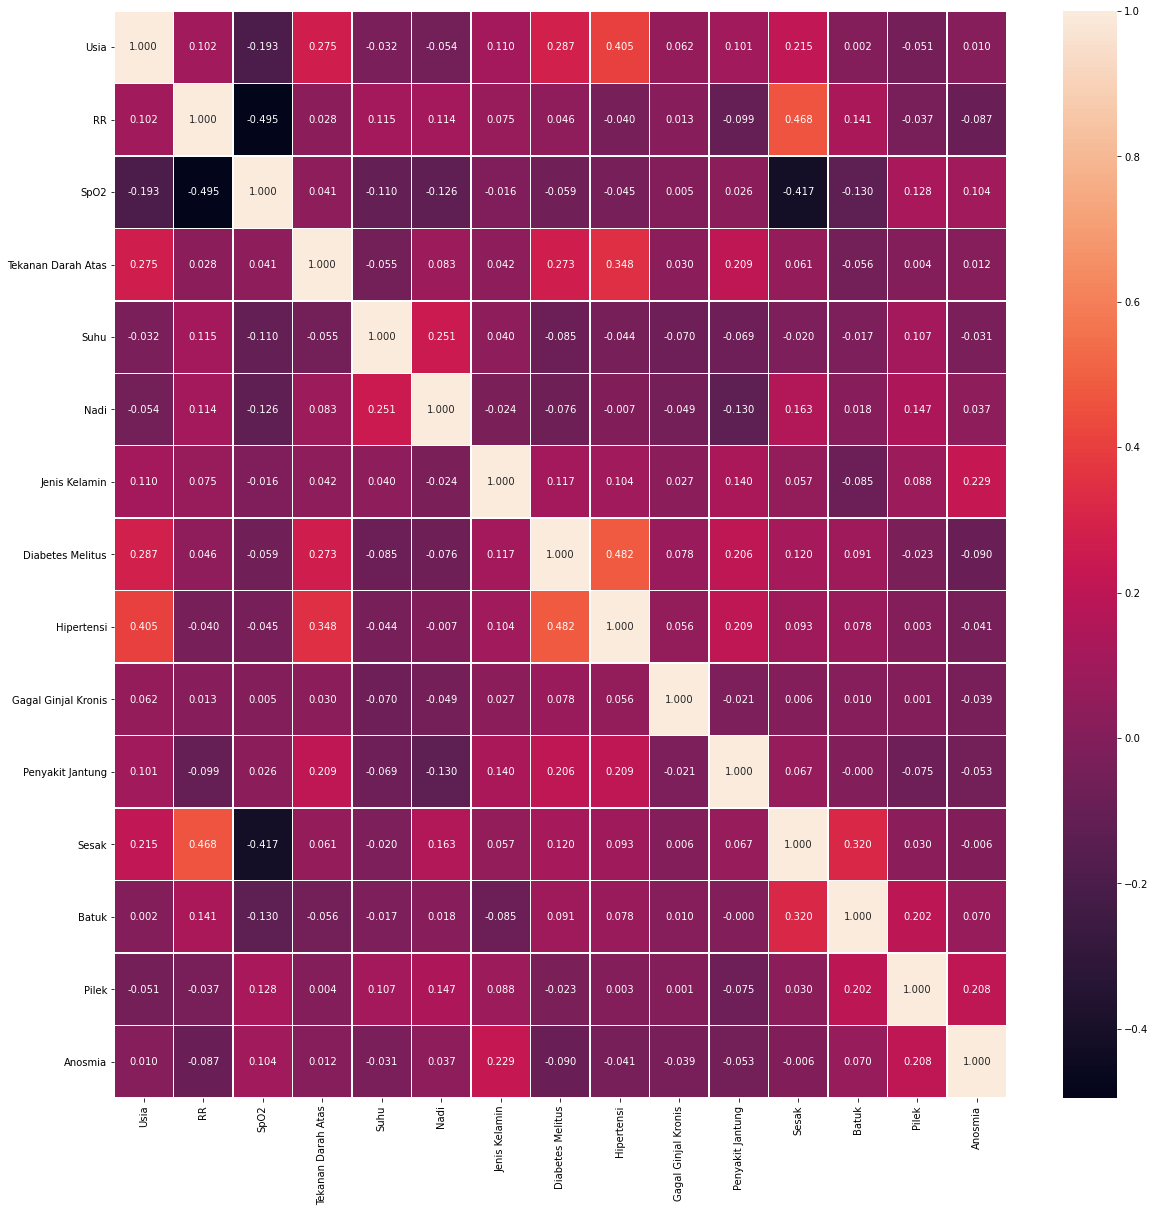

In [42]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(X.corr(), annot=True, linewidths=0.5, fmt='.3f',ax=ax)
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf'], 'gamma': [0.1, 1, 2, 3, 10], 'decision_function_shape':['ovr','ovo']}
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

clfOAA2 = SVC()
grid_search = GridSearchCV(estimator=clfOAA2, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best estimator and predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
# Display the results
print(pd.DataFrame(grid_search.cv_results_))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        87
         1.0       0.99      0.99      0.99       101
         2.0       0.89      0.89      0.89        88

    accuracy                           0.93       276
   macro avg       0.92      0.92      0.92       276
weighted avg       0.93      0.93      0.93       276

Best Parameters: {'C': 10, 'decision_function_shape': 'ovr', 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy: 0.9092595639654462
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.068887      0.005929         0.019042        0.008152     0.1   
1         0.076395      0.012343         0.018182        0.003101     0.1   
2         0.091141      0.004171         0.057895        0.002047     0.1   
3         0.056622      0.000806         0.012819        0.000998     0.1   
4         0.088536      0.008718         0.007516        0.007658     0.1   
..        

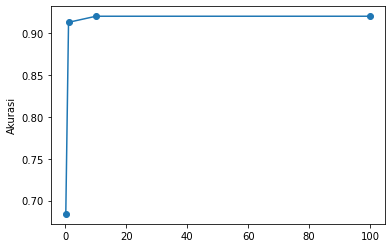

In [12]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [1], 'decision_function_shape':['ovr']}
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

clfOAA2 = SVC()
grid_search = GridSearchCV(estimator=clfOAA2, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best estimator and predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Display the results
result=pd.DataFrame(grid_search.cv_results_)
# Create a line chart
plt.plot(result['param_C'], result['mean_test_score'], marker='o')

# Add labels and title
plt.ylabel('Akurasi')

# Display the chart
plt.show()

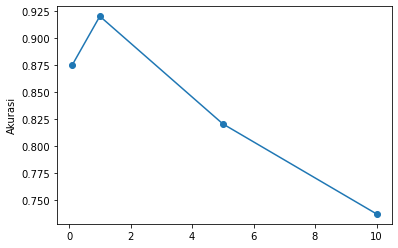

In [13]:
parameters = {'C': [10], 'kernel': ['rbf'], 'gamma': [0.1, 1, 5, 10], 'decision_function_shape':['ovr']}
grid_search = GridSearchCV(estimator=clfOAA2, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best estimator and predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Display the results
result=pd.DataFrame(grid_search.cv_results_)
# Create a line chart
plt.plot(result['param_gamma'], result['mean_test_score'], marker='o')

# Add labels and title
plt.ylabel('Akurasi')

# Display the chart
plt.show()

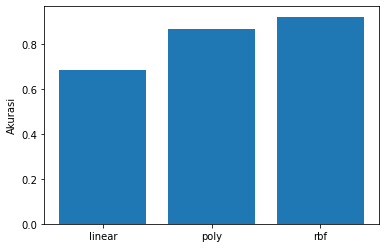

In [15]:
parameters = {'C': [10], 'kernel': ['linear','poly','rbf'], 'gamma': [1], 'decision_function_shape':['ovr']}
grid_search = GridSearchCV(estimator=clfOAA2, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best estimator and predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Display the results
result=pd.DataFrame(grid_search.cv_results_)
# Create a line chart
plt.bar(result['param_kernel'], result['mean_test_score'])

# Add labels and title
plt.ylabel('Akurasi')

# Display the chart
plt.show()

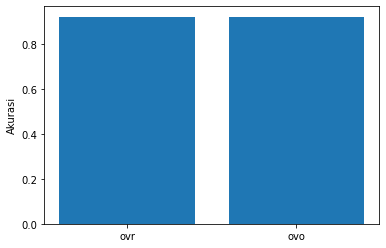

In [14]:
parameters = {'C': [10], 'kernel': ['rbf'], 'gamma': [1], 'decision_function_shape':['ovr','ovo']}
grid_search = GridSearchCV(estimator=clfOAA2, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best estimator and predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Display the results
result=pd.DataFrame(grid_search.cv_results_)
# Create a line chart
plt.bar(result['param_decision_function_shape'], result['mean_test_score'])

# Add labels and title
plt.ylabel('Akurasi')

# Display the chart
plt.show()

One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)

SPLIT NO. 1


<ipython-input-44-ff4a777f3612>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   1.000000  1.000000  1.000000       369
         2.0   1.000000  1.000000  1.000000       366

    accuracy                       1.000000      1102
   macro avg   1.000000  1.000000  1.000000      1102
weighted avg   1.000000  1.000000  1.000000      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.898876  0.869565  0.883978        92
         1.0   0.968085  0.989130  0.978495        92
         2.0   0.860215  0.869565  0.864865        92

    accuracy                       0.909420       276
   macro avg   0.909059  0.909420  0.909112       276
weighted avg   0.909059  0.909420  0.909112       276


SPLIT NO. 2


<ipython-input-44-ff4a777f3612>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   1.000000  1.000000  1.000000       369
         2.0   1.000000  1.000000  1.000000       366

    accuracy                       1.000000      1102
   macro avg   1.000000  1.000000  1.000000      1102
weighted avg   1.000000  1.000000  1.000000      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.882353  0.815217  0.847458        92
         1.0   1.000000  0.989130  0.994536        92
         2.0   0.820000  0.891304  0.854167        92

    accuracy                       0.898551       276
   macro avg   0.900784  0.898551  0.898720       276
weighted avg   0.900784  0.898551  0.898720       276


SPLIT NO. 3


<ipython-input-44-ff4a777f3612>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   1.000000  1.000000  1.000000       368
         2.0   1.000000  1.000000  1.000000       367

    accuracy                       1.000000      1102
   macro avg   1.000000  1.000000  1.000000      1102
weighted avg   1.000000  1.000000  1.000000      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.901961  1.000000  0.948454        92
         1.0   0.989247  0.989247  0.989247        93
         2.0   0.987654  0.879121  0.930233        91

    accuracy                       0.956522       276
   macro avg   0.959621  0.956123  0.955978       276
weighted avg   0.959627  0.956522  0.956192       276


SPLIT NO. 4


<ipython-input-44-ff4a777f3612>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   1.000000  1.000000  1.000000       369
         2.0   1.000000  1.000000  1.000000       367

    accuracy                       1.000000      1103
   macro avg   1.000000  1.000000  1.000000      1103
weighted avg   1.000000  1.000000  1.000000      1103

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.927835  0.978261  0.952381        92
         1.0   1.000000  1.000000  1.000000        92
         2.0   0.976744  0.923077  0.949153        91

    accuracy                       0.967273       275
   macro avg   0.968193  0.967113  0.967178       275
weighted avg   0.968162  0.967273  0.967243       275


SPLIT NO. 5


<ipython-input-44-ff4a777f3612>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       368
         1.0   1.000000  1.000000  1.000000       369
         2.0   1.000000  1.000000  1.000000       366

    accuracy                       1.000000      1103
   macro avg   1.000000  1.000000  1.000000      1103
weighted avg   1.000000  1.000000  1.000000      1103

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.918367  0.989011  0.952381        91
         1.0   0.978495  0.989130  0.983784        92
         2.0   0.988095  0.902174  0.943182        92

    accuracy                       0.960000       275
   macro avg   0.961652  0.960105  0.959782       275
weighted avg   0.961810  0.960000  0.959809       275



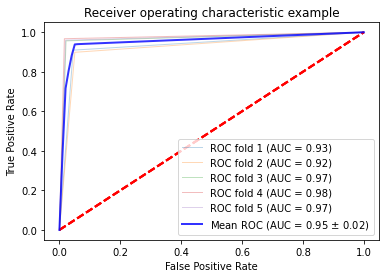

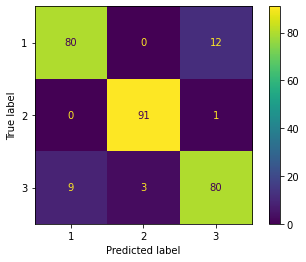

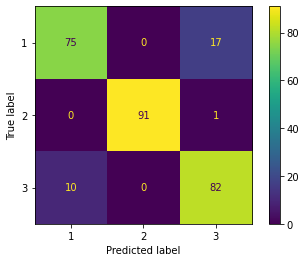

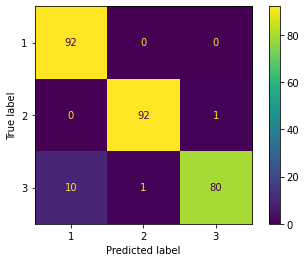

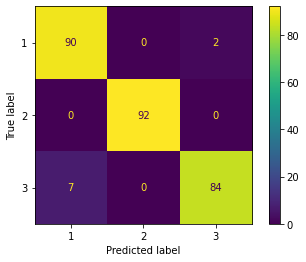

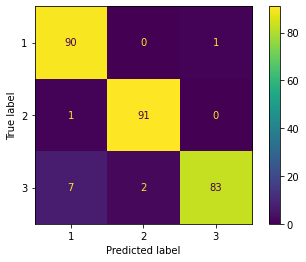

In [44]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
cm = []
#RBF
# C=10, Gamma=1
split2 = skf.split(X, Y)
accuracy_train,accuracy_test,sensitivity,precision,f1score=[],[],[],[],[]
sensitivity_tr,precision_tr,f1score_tr=[],[],[]
i = 1
print("One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)")
for fold_no, (train_index2, test_index2) in enumerate(split2):
    #Split Train-Test Data
    print("\nSPLIT NO. {}".format(fold_no+1))
    X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2]
    Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
#     Y_train2=label_binarize(Y_train2, classes=np.unique(Y))
#     Y_test2=label_binarize(Y_test2, classes=np.unique(Y))
    #Building the model
    clfOAA2 = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=1,
                                      probability=True,
                                      decision_function_shape='ovr')) 
    modelclfOAA2 = clfOAA2.fit(X_train2, Y_train2)
    #Accuracy the data testing
    y_pred_clfOAA2 = modelclfOAA2.predict(X_test2)
    y_pred_clfOAA2 = np.round(y_pred_clfOAA2)
    y_pred_clfOAA2_train = modelclfOAA2.predict(X_train2)
    y_pred_clfOAA2_train = np.round(y_pred_clfOAA2_train)
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    cm.append(cm_clfOAA2)
    sk_report_clfOAA2_tr = classification_report(digits=6,y_true=Y_train2, y_pred=y_pred_clfOAA2_train) 
    sk_report_clfOAA2 = classification_report(digits=6, y_true=Y_test2,y_pred=y_pred_clfOAA2)
    # Compute ROC curve and area the curve
    Y_test2=label_binarize(Y_test2, classes=np.unique(Y))
    y_pred_clfOAA2=label_binarize(y_pred_clfOAA2, classes=np.unique(Y))
    fpr, tpr, thresholds = roc_curve(Y_test2.ravel(),y_pred_clfOAA2.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    print("*DATA TRAINING*")
    print("Classification Report:\n",sk_report_clfOAA2_tr)
    print("*DATA TESTING*")
    print("Classification Report:\n",sk_report_clfOAA2)
        
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
for fold_no in range(len(cm)):
    cm_display2 = ConfusionMatrixDisplay(cm[fold_no],
    display_labels=['1','2','3']).plot()

One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)

SPLIT NO. 1


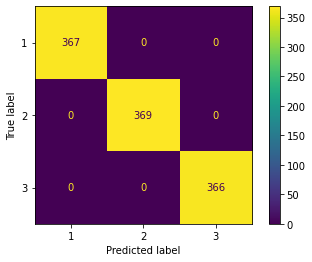

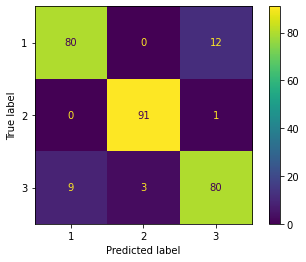

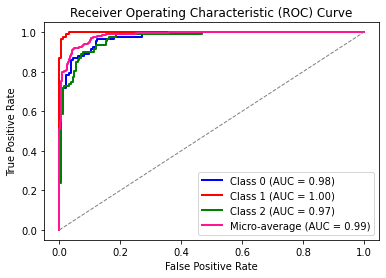

*DATA TRAINING*
Confusion Matrix:
 [[367   0   0]
 [  0 369   0]
 [  0   0 366]]
Accuracy:  1.0
macro Recall=  1.0
macro F1 Score=  1.0
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   1.000000  1.000000  1.000000       369
         2.0   1.000000  1.000000  1.000000       366

    accuracy                       1.000000      1102
   macro avg   1.000000  1.000000  1.000000      1102
weighted avg   1.000000  1.000000  1.000000      1102

*DATA TESTING*
Confusion Matrix:
 [[80  0 12]
 [ 0 91  1]
 [ 9  3 80]]
Accuracy for data test=  0.9094202898550725
macro Recall=  0.9094202898550724
macro F1 Score=  0.9091124630244217
Classification Report:
               precision    recall  f1-score   support

         0.0   0.898876  0.869565  0.883978        92
         1.0   0.968085  0.989130  0.978495        92
         2.0   0.860215  0.869565  0.864865        92

    accuracy                    

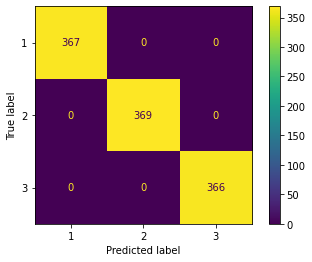

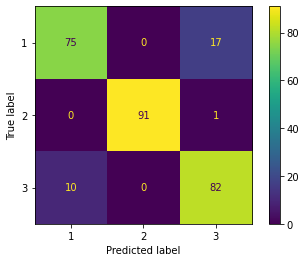

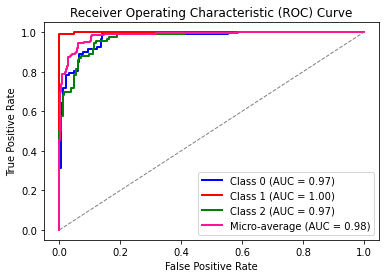

*DATA TRAINING*
Confusion Matrix:
 [[367   0   0]
 [  0 369   0]
 [  0   0 366]]
Accuracy:  1.0
macro Recall=  1.0
macro F1 Score=  1.0
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   1.000000  1.000000  1.000000       369
         2.0   1.000000  1.000000  1.000000       366

    accuracy                       1.000000      1102
   macro avg   1.000000  1.000000  1.000000      1102
weighted avg   1.000000  1.000000  1.000000      1102

*DATA TESTING*
Confusion Matrix:
 [[75  0 17]
 [ 0 91  1]
 [10  0 82]]
Accuracy for data test=  0.9039855072463768
macro Recall=  0.8985507246376812
macro F1 Score=  0.898719937636998
Classification Report:
               precision    recall  f1-score   support

         0.0   0.882353  0.815217  0.847458        92
         1.0   1.000000  0.989130  0.994536        92
         2.0   0.820000  0.891304  0.854167        92

    accuracy                     

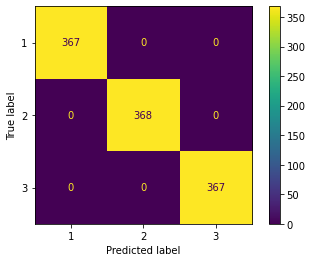

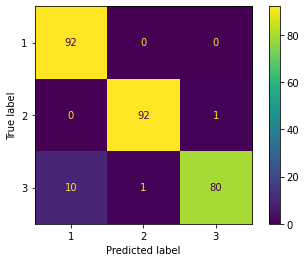

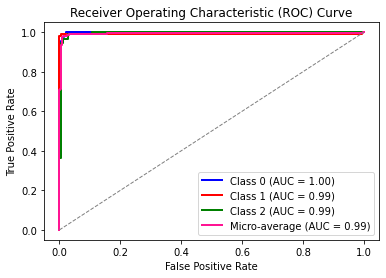

*DATA TRAINING*
Confusion Matrix:
 [[367   0   0]
 [  0 368   0]
 [  0   0 367]]
Accuracy:  1.0
macro Recall=  1.0
macro F1 Score=  1.0
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   1.000000  1.000000  1.000000       368
         2.0   1.000000  1.000000  1.000000       367

    accuracy                       1.000000      1102
   macro avg   1.000000  1.000000  1.000000      1102
weighted avg   1.000000  1.000000  1.000000      1102

*DATA TESTING*
Confusion Matrix:
 [[92  0  0]
 [ 0 92  1]
 [10  1 80]]
Accuracy for data test=  0.9214975845410628
macro Recall=  0.9561227303162787
macro F1 Score=  0.9559778260716382
Classification Report:
               precision    recall  f1-score   support

         0.0   0.901961  1.000000  0.948454        92
         1.0   0.989247  0.989247  0.989247        93
         2.0   0.987654  0.879121  0.930233        91

    accuracy                    

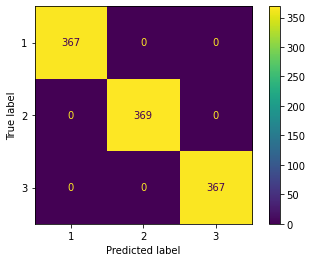

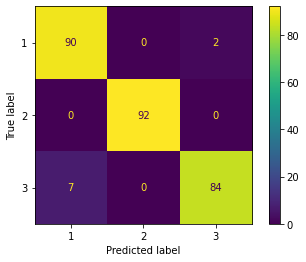

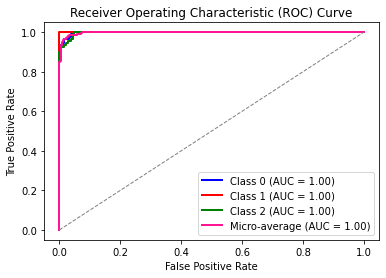

*DATA TRAINING*
Confusion Matrix:
 [[367   0   0]
 [  0 369   0]
 [  0   0 367]]
Accuracy:  1.0
macro Recall=  1.0
macro F1 Score=  1.0
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   1.000000  1.000000  1.000000       369
         2.0   1.000000  1.000000  1.000000       367

    accuracy                       1.000000      1103
   macro avg   1.000000  1.000000  1.000000      1103
weighted avg   1.000000  1.000000  1.000000      1103

*DATA TESTING*
Confusion Matrix:
 [[90  0  2]
 [ 0 92  0]
 [ 7  0 84]]
Accuracy for data test=  0.9329413702239789
macro Recall=  0.9671125975473801
macro F1 Score=  0.9671778315846113
Classification Report:
               precision    recall  f1-score   support

         0.0   0.927835  0.978261  0.952381        92
         1.0   1.000000  1.000000  1.000000        92
         2.0   0.976744  0.923077  0.949153        91

    accuracy                    

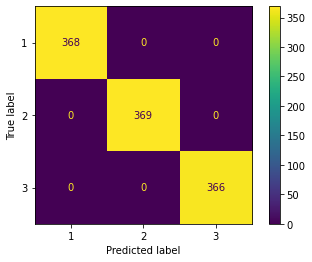

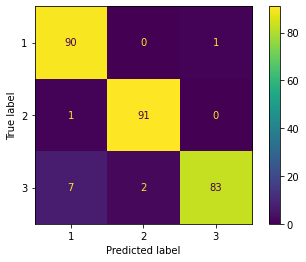

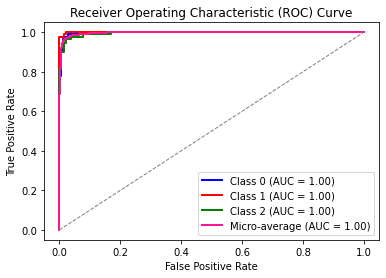

*DATA TRAINING*
Confusion Matrix:
 [[368   0   0]
 [  0 369   0]
 [  0   0 366]]
Accuracy:  1.0
macro Recall=  1.0
macro F1 Score=  1.0
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       368
         1.0   1.000000  1.000000  1.000000       369
         2.0   1.000000  1.000000  1.000000       366

    accuracy                       1.000000      1103
   macro avg   1.000000  1.000000  1.000000      1103
weighted avg   1.000000  1.000000  1.000000      1103

*DATA TESTING*
Confusion Matrix:
 [[90  0  1]
 [ 1 91  0]
 [ 7  2 83]]
Accuracy for data test=  0.938353096179183
macro Recall=  0.9601051122790253
macro F1 Score=  0.9597821847821848
Classification Report:
               precision    recall  f1-score   support

         0.0   0.918367  0.989011  0.952381        91
         1.0   0.978495  0.989130  0.983784        92
         2.0   0.988095  0.902174  0.943182        92

    accuracy                     

In [72]:

#RBF
# C=10, Gamma=1
split2 = skf.split(X, Y)
accuracy_train,accuracy_test,sensitivity,precision,f1score=[],[],[],[],[]
sensitivity_tr,precision_tr,f1score_tr=[],[],[]
i = 1
print("One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)")
for fold_no, (train_index2, test_index2) in enumerate(split2):
    #Split Train-Test Data
    print("\nSPLIT NO. {}".format(fold_no+1))
    X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2]
    Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
    #Building the model
    clfOAA2 = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=1,
                                      probability=True,
                                      decision_function_shape='ovr')) 
    modelclfOAA2 = clfOAA2.fit(X_train2, Y_train2)
    #Accuracy of data training
    accuracy_train.append(modelclfOAA2.score(X_train2,Y_train2))
    #Accuracy the data testing
    y_pred_clfOAA2 = modelclfOAA2.predict(X_test2)
    accuracy_test.append(accuracy_score(Y_test2,y_pred_clfOAA2))
    #Confusion matrix in data training
    y_pred_clfOAA2_train = modelclfOAA2.predict(X_train2)
    cm_clfOAA2_tr=confusion_matrix(Y_train2,y_pred_clfOAA2_train)
    #Confusion matrix in data testing
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    #Recall, Precision, F1Score in data training
    recall_clfOAA2_tr = recall_score(Y_train2,y_pred_clfOAA2_train,average='macro')
    f1score_clfOAA2_tr = f1_score(Y_train2,y_pred_clfOAA2_train,average='macro')
    #Recall, Precision, F1Score in data testing
    recall_clfOAA2 = recall_score(Y_test2,y_pred_clfOAA2,average='macro')
    f1score_clfOAA2 = f1_score(Y_test2,y_pred_clfOAA2,average='macro')
    acc_clfOAA2_train=np.mean(accuracy_train)
    acc_clfOAA2_test=np.mean(accuracy_test) 
    sk_report_clfOAA2_tr = classification_report(digits=6,y_true=Y_train2, y_pred=y_pred_clfOAA2_train) 
    sk_report_clfOAA2 = classification_report(digits=6, y_true=Y_test2,y_pred=y_pred_clfOAA2) 
    cm_display2_train = ConfusionMatrixDisplay(cm_clfOAA2_tr,
    display_labels=['1','2','3']).plot() 
    cm_display2 = ConfusionMatrixDisplay(cm_clfOAA2,
    display_labels=['1','2','3']).plot() 
    
    y_test_bin = label_binarize(Y_test2, classes=np.unique(Y_train2))
    n_classes = y_test_bin.shape[1]

    # Compute predicted probabilities for each class
    y_score = clfOAA2.predict_proba(X_test2)

    # Compute ROC curve and ROC AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve for each class
    plt.figure()
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

    # Plot micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=2,
             label='Micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]))

    # Add random guessing line
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

    # Set plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Show the plot
    plt.show()
    print("*DATA TRAINING*")
    print("Confusion Matrix:\n",cm_clfOAA2_tr)
    print("Accuracy: ", acc_clfOAA2_train)
    print("macro Recall= ",recall_clfOAA2_tr)
    print("macro F1 Score= ", f1score_clfOAA2_tr)
    print("Classification Report:\n",sk_report_clfOAA2_tr)
    print("*DATA TESTING*")
    print("Confusion Matrix:\n",cm_clfOAA2)
    print("Accuracy for data test= ", acc_clfOAA2_test)
    print("macro Recall= ",recall_clfOAA2)
    print("macro F1 Score= ", f1score_clfOAA2)
    print("Classification Report:\n",sk_report_clfOAA2)
    
    i= i+1

One Against One (OAO) - Kernel: RBF (C=10, Gamma=1)

SPLIT NO. 1


C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


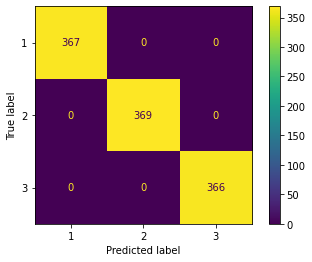

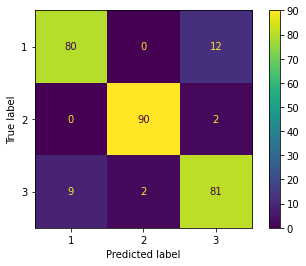

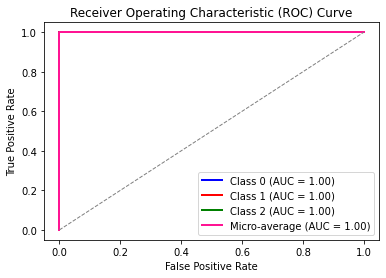

*DATA TRAINING*
Confusion Matrix:
 [[367   0   0]
 [  0 369   0]
 [  0   0 366]]
Accuracy:  1.0
macro Recall=  1.0
macro F1 Score=  1.0
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   1.000000  1.000000  1.000000       369
         2.0   1.000000  1.000000  1.000000       366

    accuracy                       1.000000      1102
   macro avg   1.000000  1.000000  1.000000      1102
weighted avg   1.000000  1.000000  1.000000      1102

*DATA TESTING*
Confusion Matrix:
 [[80  0 12]
 [ 0 90  2]
 [ 9  2 81]]
Accuracy for data test=  0.9094202898550725
macroo Recall=  0.9094202898550724
macro F1 Score=  0.9095163101818371
Classification Report:
               precision    recall  f1-score   support

         0.0   0.898876  0.869565  0.883978        92
         1.0   0.978261  0.978261  0.978261        92
         2.0   0.852632  0.880435  0.866310        92

    accuracy                   

C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


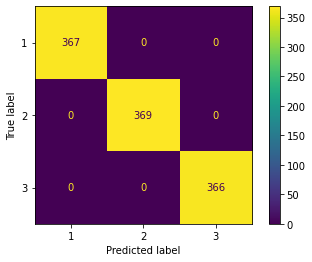

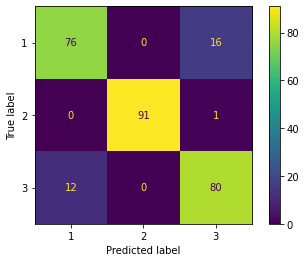

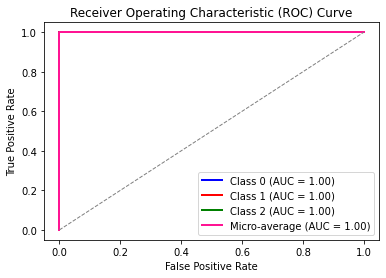

*DATA TRAINING*
Confusion Matrix:
 [[367   0   0]
 [  0 369   0]
 [  0   0 366]]
Accuracy:  1.0
macro Recall=  1.0
macro F1 Score=  1.0
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   1.000000  1.000000  1.000000       369
         2.0   1.000000  1.000000  1.000000       366

    accuracy                       1.000000      1102
   macro avg   1.000000  1.000000  1.000000      1102
weighted avg   1.000000  1.000000  1.000000      1102

*DATA TESTING*
Confusion Matrix:
 [[76  0 16]
 [ 0 91  1]
 [12  0 80]]
Accuracy for data test=  0.9021739130434783
macroo Recall=  0.8949275362318839
macro F1 Score=  0.895180270043658
Classification Report:
               precision    recall  f1-score   support

         0.0   0.863636  0.826087  0.844444        92
         1.0   1.000000  0.989130  0.994536        92
         2.0   0.824742  0.869565  0.846561        92

    accuracy                    

C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


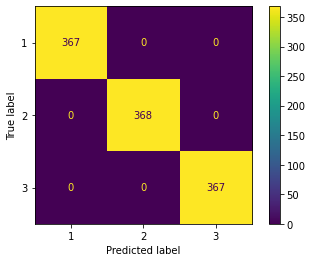

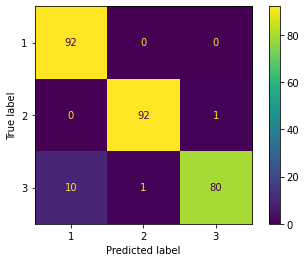

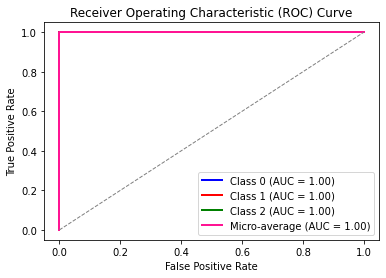

*DATA TRAINING*
Confusion Matrix:
 [[367   0   0]
 [  0 368   0]
 [  0   0 367]]
Accuracy:  1.0
macro Recall=  1.0
macro F1 Score=  1.0
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   1.000000  1.000000  1.000000       368
         2.0   1.000000  1.000000  1.000000       367

    accuracy                       1.000000      1102
   macro avg   1.000000  1.000000  1.000000      1102
weighted avg   1.000000  1.000000  1.000000      1102

*DATA TESTING*
Confusion Matrix:
 [[92  0  0]
 [ 0 92  1]
 [10  1 80]]
Accuracy for data test=  0.9202898550724639
macroo Recall=  0.9561227303162787
macro F1 Score=  0.9559778260716382
Classification Report:
               precision    recall  f1-score   support

         0.0   0.901961  1.000000  0.948454        92
         1.0   0.989247  0.989247  0.989247        93
         2.0   0.987654  0.879121  0.930233        91

    accuracy                   

C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


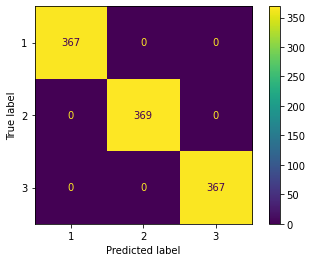

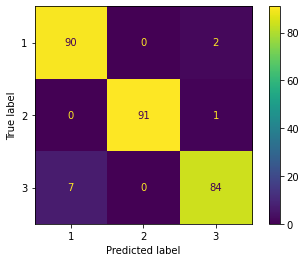

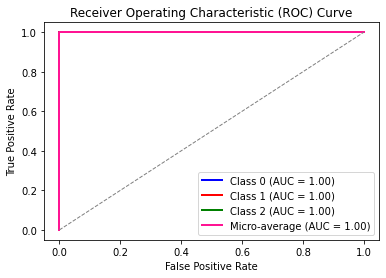

*DATA TRAINING*
Confusion Matrix:
 [[367   0   0]
 [  0 369   0]
 [  0   0 367]]
Accuracy:  1.0
macro Recall=  1.0
macro F1 Score=  1.0
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   1.000000  1.000000  1.000000       369
         2.0   1.000000  1.000000  1.000000       367

    accuracy                       1.000000      1103
   macro avg   1.000000  1.000000  1.000000      1103
weighted avg   1.000000  1.000000  1.000000      1103

*DATA TESTING*
Confusion Matrix:
 [[90  0  2]
 [ 0 91  1]
 [ 7  0 84]]
Accuracy for data test=  0.9311264822134389
macroo Recall=  0.9634894091415832
macro F1 Score=  0.9635788987419122
Classification Report:
               precision    recall  f1-score   support

         0.0   0.927835  0.978261  0.952381        92
         1.0   1.000000  0.989130  0.994536        92
         2.0   0.965517  0.923077  0.943820        91

    accuracy                   

C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


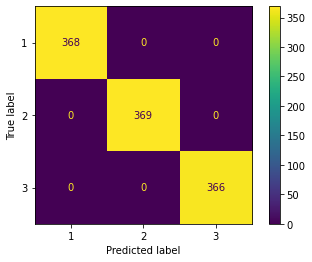

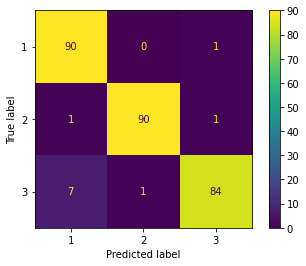

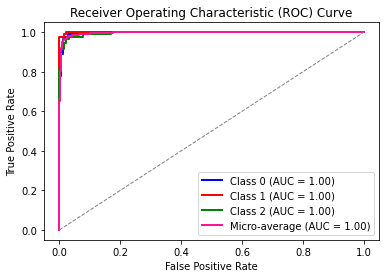

*DATA TRAINING*
Confusion Matrix:
 [[368   0   0]
 [  0 369   0]
 [  0   0 366]]
Accuracy:  1.0
macro Recall=  1.0
macro F1 Score=  1.0
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       368
         1.0   1.000000  1.000000  1.000000       369
         2.0   1.000000  1.000000  1.000000       366

    accuracy                       1.000000      1103
   macro avg   1.000000  1.000000  1.000000      1103
weighted avg   1.000000  1.000000  1.000000      1103

*DATA TESTING*
Confusion Matrix:
 [[90  0  1]
 [ 1 90  1]
 [ 7  1 84]]
Accuracy for data test=  0.9369011857707511
macroo Recall=  0.9601051122790253
macro F1 Score=  0.9599359114923676
Classification Report:
               precision    recall  f1-score   support

         0.0   0.918367  0.989011  0.952381        91
         1.0   0.989011  0.978261  0.983607        92
         2.0   0.976744  0.913043  0.943820        92

    accuracy                   

In [24]:

# C=10, Gamma=1
split2 = skf.split(X, Y)
accuracy_train,accuracy_test,sensitivity,precision,f1score=[],[],[],[],[]
sensitivity_tr,precision_tr,f1score_tr=[],[],[]
i = 1
print("One Against One (OAO) - Kernel: RBF (C=10, Gamma=1)")
for fold_no, (train_index2, test_index2) in enumerate(split2): 
    #Split Train-Test Data
    print("\nSPLIT NO. {}".format(fold_no+1))
    X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2]
    Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
    #Building the model
    clfOAO2 = OneVsOneClassifier(SVC(kernel='rbf', C=10, gamma=1,
                                     probability=True,
                                     decision_function_shape='ovo')) 
    modelclfOAO2 = clfOAO2.fit(X_train2, Y_train2)
    #Accuracy of data training
    accuracy_train.append(modelclfOAO2.score(X_train2,Y_train2))
    #Accuracy the data testing
    y_pred_clfOAO2 = modelclfOAO2.predict(X_test2)
    accuracy_test.append(accuracy_score(Y_test2,y_pred_clfOAO2))
    #Confusion matrix in data training
    y_pred_clfOAO2_train = modelclfOAO2.predict(X_train2)
    cm_clfOAO2_tr=confusion_matrix(Y_train2,y_pred_clfOAO2_train)
    #Confusion matrix in data testing
    cm_clfOAO2=confusion_matrix(Y_test2,y_pred_clfOAO2)
    #Recall, Precision, F1Score in data training 
    recall_clfOAO2_tr =recall_score(Y_train2,y_pred_clfOAO2_train,average='macro') 
    f1score_clfOAO2_tr = f1_score(Y_train2,y_pred_clfOAO2_train,average='macro') 
    #Recall, Precision, F1Score in data testing
    recall_clfOAO2 = recall_score(Y_test2,y_pred_clfOAO2,average='macro')
    f1score_clfOAO2 = f1_score(Y_test2,y_pred_clfOAO2,average='macro')
    acc_clfOAO2_train=np.mean(accuracy_train)
    acc_clfOAO2_test=np.mean(accuracy_test) 
    sk_report_clfOAO2_tr = classification_report(digits=6,y_true=Y_train2, y_pred=y_pred_clfOAO2_train) 
    sk_report_clfOAO2 = classification_report(digits=6, y_true=Y_test2,y_pred=y_pred_clfOAO2) 
    cm_display2_train = ConfusionMatrixDisplay(cm_clfOAO2_tr,display_labels=['1','2','3']).plot() 
    cm_display2 = ConfusionMatrixDisplay(cm_clfOAO2,display_labels=['1','2','3']).plot() 
    y_test_bin = label_binarize(Y_test2, classes=np.unique(Y_train2))
    n_classes = y_test_bin.shape[1]

    # Compute predicted probabilities for each class
    y_score = clfOAA2.predict_proba(X_test2)

    # Compute ROC curve and ROC AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve for each class
    plt.figure()
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

    # Plot micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=2,
             label='Micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]))

    # Add random guessing line
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

    # Set plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Show the plot
    plt.show()
    print("*DATA TRAINING*")
    print("Confusion Matrix:\n",cm_clfOAO2_tr)
    print("Accuracy: ", acc_clfOAO2_train)
    print("macro Recall= ",recall_clfOAO2_tr)
    print("macro F1 Score= ", f1score_clfOAO2_tr)
    print("Classification Report:\n",sk_report_clfOAO2_tr)
    print("*DATA TESTING*")
    print("Confusion Matrix:\n",cm_clfOAO2)
    print("Accuracy for data test= ", acc_clfOAO2_test)
    print("macroo Recall= ",recall_clfOAO2)
    print("macro F1 Score= ", f1score_clfOAO2)
    print("Classification Report:\n",sk_report_clfOAO2)
    
    i= i+1 

                Feature  Importance
1                    RR    0.141904
2                  SpO2    0.140601
0                  Usia    0.121404
3    Tekanan Darah Atas    0.089587
5                  Nadi    0.087843
8            Hipertensi    0.071719
11                Sesak    0.070213
4                  Suhu    0.069099
13                Pilek    0.049681
6         Jenis Kelamin    0.047089
14              Anosmia    0.039852
7      Diabetes Melitus    0.034503
12                Batuk    0.028988
10     Penyakit Jantung    0.006906
9   Gagal Ginjal Kronis    0.000612


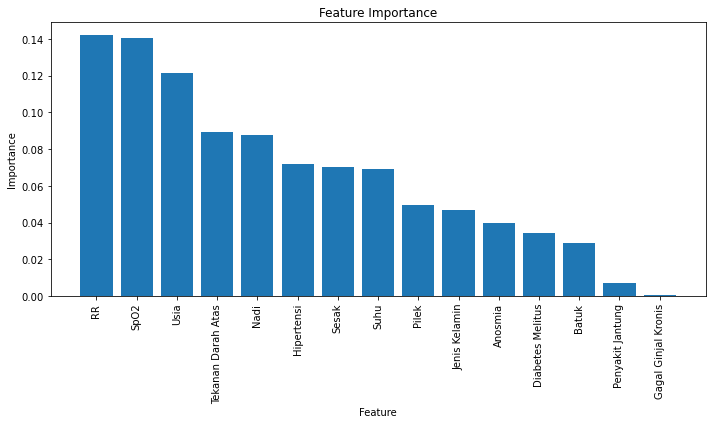

In [34]:
RF = RandomForestClassifier() 
RF = RF.fit(X,Y)
importances = RF.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [8]:
classifiers = []
def _bootstrap_dataset(dataset: pd.DataFrame):
    chosen_idxs = np.random.choice(dataset.shape[0], size=dataset.shape[0], replace=True)
    return dataset[chosen_idxs]

def RFSVM_fit(X: pd.DataFrame, y: pd.DataFrame, num_classifiers: int):
    dataset = np.concatenate([X, y], axis=1)
    for i in range(num_classifiers):
        boostrapped_dataset = _bootstrap_dataset(dataset)
        svm = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=1,
                                      probability=True,
                                      decision_function_shape='ovr')) 
        svm.fit(boostrapped_dataset[:, :-1], boostrapped_dataset[:, -1])
        classifiers.append(svm)
        
def RFSVM_predict(X: pd.DataFrame):
    y_pred=[]
    pred=[classifier.predict(X) for classifier in classifiers]
    for j in range(X.shape[0]):
        result=[]
        for i in range(len(classifiers)):
            result.append(stats.mode(pred[i][j])[0][0])
        y_pred.append(stats.mode(result)[0][0])
    return y_pred

def RFSVM_predict_proba(X: pd.DataFrame):
    y_score=[[] for _ in range(X.shape[0])]
    pred=[classifier.predict_proba(X) for classifier in classifiers]
    for k in range(3):
        #ada 3 label kelas respon= len(np.unique(Y))
        for j in range(X.shape[0]):
            result2=[]
            for i in range(len(classifiers)):
                result2.append(pred[i][j][k])
            y_score[j].append(np.mean(result2))
    return y_score

One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)

SPLIT NO. 1


<ipython-input-44-cfb045596baf>:38: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   1.000000  1.000000  1.000000       369
         2.0   1.000000  1.000000  1.000000       366

    accuracy                       1.000000      1102
   macro avg   1.000000  1.000000  1.000000      1102
weighted avg   1.000000  1.000000  1.000000      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.877778  0.858696  0.868132        92
         1.0   0.947917  0.989130  0.968085        92
         2.0   0.866667  0.847826  0.857143        92

    accuracy                       0.898551       276
   macro avg   0.897454  0.898551  0.897787       276
weighted avg   0.897454  0.898551  0.897787       276


SPLIT NO. 2


<ipython-input-44-cfb045596baf>:38: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.975342  0.970027  0.972678       367
         1.0   0.991914  0.997290  0.994595       369
         2.0   0.967213  0.967213  0.967213       366

    accuracy                       0.978221      1102
   macro avg   0.978156  0.978177  0.978162      1102
weighted avg   0.978191  0.978221  0.978202      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.882979  0.902174  0.892473        92
         1.0   1.000000  0.989130  0.994536        92
         2.0   0.890110  0.880435  0.885246        92

    accuracy                       0.923913       276
   macro avg   0.924363  0.923913  0.924085       276
weighted avg   0.924363  0.923913  0.924085       276


SPLIT NO. 3


<ipython-input-44-cfb045596baf>:38: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.958904  0.953678  0.956284       367
         1.0   0.994580  0.997283  0.995929       368
         2.0   0.951087  0.953678  0.952381       367

    accuracy                       0.968240      1102
   macro avg   0.968190  0.968213  0.968198      1102
weighted avg   0.968214  0.968240  0.968223      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.958333  1.000000  0.978723        92
         1.0   0.989362  1.000000  0.994652        93
         2.0   1.000000  0.945055  0.971751        91

    accuracy                       0.981884       276
   macro avg   0.982565  0.981685  0.981709       276
weighted avg   0.982526  0.981884  0.981792       276


SPLIT NO. 4


<ipython-input-44-cfb045596baf>:38: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.964960  0.975477  0.970190       367
         1.0   0.991914  0.997290  0.994595       369
         2.0   0.972299  0.956403  0.964286       367

    accuracy                       0.976428      1103
   macro avg   0.976391  0.976390  0.976357      1103
weighted avg   0.976419  0.976428  0.976390      1103

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.948454  1.000000  0.973545        92
         1.0   1.000000  1.000000  1.000000        92
         2.0   1.000000  0.945055  0.971751        91

    accuracy                       0.981818       275
   macro avg   0.982818  0.981685  0.981765       275
weighted avg   0.982755  0.981818  0.981802       275


SPLIT NO. 5


<ipython-input-44-cfb045596baf>:38: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.983914  0.997283  0.990553       368
         1.0   0.997297  1.000000  0.998647       369
         2.0   0.997222  0.980874  0.988981       366

    accuracy                       0.992747      1103
   macro avg   0.992811  0.992719  0.992727      1103
weighted avg   0.992807  0.992747  0.992739      1103

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000        91
         1.0   1.000000  1.000000  1.000000        92
         2.0   1.000000  1.000000  1.000000        92

    accuracy                       1.000000       275
   macro avg   1.000000  1.000000  1.000000       275
weighted avg   1.000000  1.000000  1.000000       275



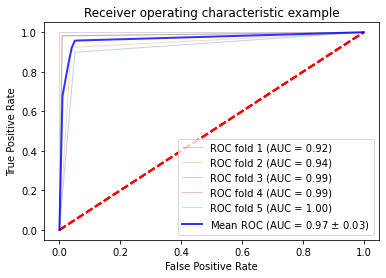

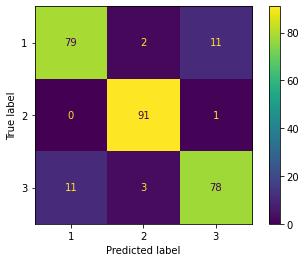

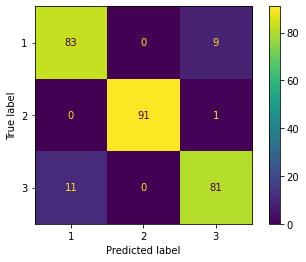

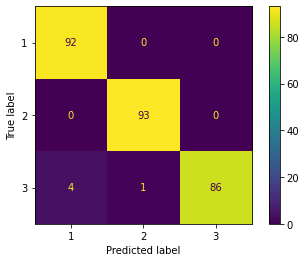

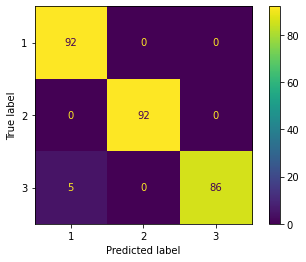

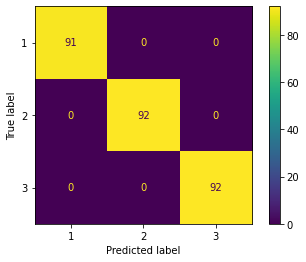

In [44]:
X = pd.DataFrame(X.values, columns=None)
Y = pd.DataFrame(Y.values, columns=None)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
cm = []
#RBF
# C=10, Gamma=1
split2 = skf.split(X, Y)
accuracy_train,accuracy_test,sensitivity,precision,f1score=[],[],[],[],[]
sensitivity_tr,precision_tr,f1score_tr=[],[],[]
i = 1
print("One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)")
for fold_no, (train_index2, test_index2) in enumerate(split2):
    #Split Train-Test Data
    print("\nSPLIT NO. {}".format(fold_no+1))
    X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2]
    Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
    #Building the model
    RFSVM_fit(X_train2, Y_train2,100)
    y_pred_clfOAA2 = RFSVM_predict(X_test2)
    #Confusion matrix in data training
    y_pred_clfOAA2_train = RFSVM_predict(X_train2)
    y_pred_clfOAA2 = np.round(y_pred_clfOAA2)
    y_pred_clfOAA2_train = np.round(y_pred_clfOAA2_train)
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    #Confusion matrix in data testing
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    cm.append(cm_clfOAA2)
    sk_report_clfOAA2_tr = classification_report(digits=6,y_true=Y_train2, y_pred=y_pred_clfOAA2_train) 
    sk_report_clfOAA2 = classification_report(digits=6, y_true=Y_test2,y_pred=y_pred_clfOAA2)
    # Compute ROC curve and area the curve
    Y_test2=label_binarize(Y_test2, classes=np.unique(Y))
    y_pred_clfOAA2=label_binarize(y_pred_clfOAA2, classes=np.unique(Y))
    fpr, tpr, thresholds = roc_curve(Y_test2.ravel(),y_pred_clfOAA2.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    print("*DATA TRAINING*")
    print("Classification Report:\n",sk_report_clfOAA2_tr)
    print("*DATA TESTING*")
    print("Classification Report:\n",sk_report_clfOAA2)
        
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
for fold_no in range(len(cm)):
    cm_display2 = ConfusionMatrixDisplay(cm[fold_no],
    display_labels=['1','2','3']).plot()

One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)

SPLIT NO. 1


<ipython-input-10-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   0.997297  1.000000  0.998647       369
         2.0   1.000000  0.997268  0.998632       366

    accuracy                       0.999093      1102
   macro avg   0.999099  0.999089  0.999093      1102
weighted avg   0.999095  0.999093  0.999093      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.879121  0.869565  0.874317        92
         1.0   0.947917  0.989130  0.968085        92
         2.0   0.876404  0.847826  0.861878        92

    accuracy                       0.902174       276
   macro avg   0.901147  0.902174  0.901427       276
weighted avg   0.901147  0.902174  0.901427       276


SPLIT NO. 2


<ipython-input-10-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.978022  0.970027  0.974008       367
         1.0   0.994595  0.997290  0.995940       369
         2.0   0.967391  0.972678  0.970027       366

    accuracy                       0.980036      1102
   macro avg   0.980003  0.979998  0.979992      1102
weighted avg   0.980041  0.980036  0.980030      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.892473  0.902174  0.897297        92
         1.0   1.000000  0.989130  0.994536        92
         2.0   0.891304  0.891304  0.891304        92

    accuracy                       0.927536       276
   macro avg   0.927926  0.927536  0.927712       276
weighted avg   0.927926  0.927536  0.927712       276


SPLIT NO. 3


<ipython-input-10-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.964187  0.953678  0.958904       367
         1.0   0.994580  0.997283  0.995929       368
         2.0   0.951351  0.959128  0.955224       367

    accuracy                       0.970054      1102
   macro avg   0.970040  0.970030  0.970019      1102
weighted avg   0.970062  0.970054  0.970043      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.948454  1.000000  0.973545        92
         1.0   0.989362  1.000000  0.994652        93
         2.0   1.000000  0.934066  0.965909        91

    accuracy                       0.978261       276
   macro avg   0.979272  0.978022  0.978035       276
weighted avg   0.979233  0.978261  0.978140       276


SPLIT NO. 4


<ipython-input-10-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.969780  0.961853  0.965800       367
         1.0   0.991914  0.997290  0.994595       369
         2.0   0.959239  0.961853  0.960544       367

    accuracy                       0.973708      1103
   macro avg   0.973644  0.973665  0.973646      1103
weighted avg   0.973677  0.973708  0.973684      1103

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.968421  1.000000  0.983957        92
         1.0   1.000000  1.000000  1.000000        92
         2.0   1.000000  0.967033  0.983240        91

    accuracy                       0.989091       275
   macro avg   0.989474  0.989011  0.989066       275
weighted avg   0.989435  0.989091  0.989087       275


SPLIT NO. 5


<ipython-input-10-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.994490  0.980978  0.987688       368
         1.0   0.997297  1.000000  0.998647       369
         2.0   0.981081  0.991803  0.986413       366

    accuracy                       0.990934      1103
   macro avg   0.990956  0.990927  0.990916      1103
weighted avg   0.990980  0.990934  0.990931      1103

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000        91
         1.0   0.989247  1.000000  0.994595        92
         2.0   1.000000  0.989130  0.994536        92

    accuracy                       0.996364       275
   macro avg   0.996416  0.996377  0.996377       275
weighted avg   0.996403  0.996364  0.996364       275



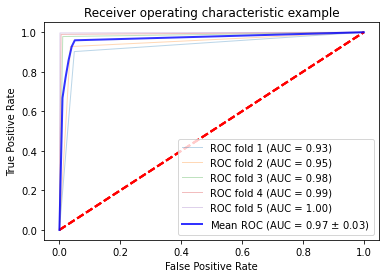

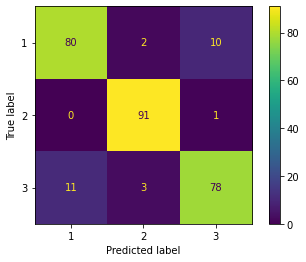

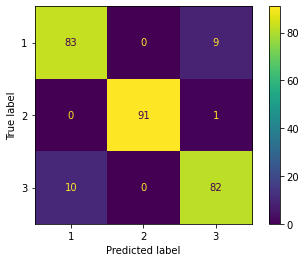

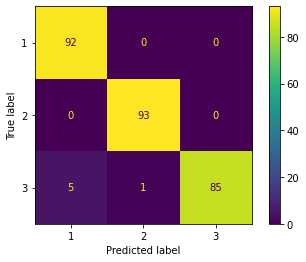

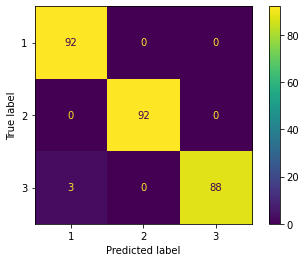

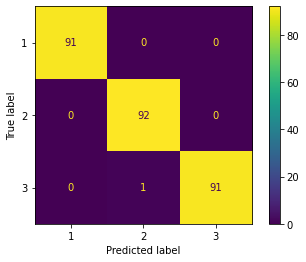

In [10]:
X = pd.DataFrame(X.values, columns=None)
Y = pd.DataFrame(Y.values, columns=None)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
cm = []
#RBF
# C=10, Gamma=1
split2 = skf.split(X, Y)
accuracy_train,accuracy_test,sensitivity,precision,f1score=[],[],[],[],[]
sensitivity_tr,precision_tr,f1score_tr=[],[],[]
i = 1
print("One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)")
for fold_no, (train_index2, test_index2) in enumerate(split2):
    #Split Train-Test Data
    print("\nSPLIT NO. {}".format(fold_no+1))
    X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2]
    Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
#     Y_train2=label_binarize(Y_train2, classes=np.unique(Y))
#     Y_test2=label_binarize(Y_test2, classes=np.unique(Y))
    #Building the model
    RFSVM_fit(X_train2, Y_train2,100)
    y_pred_clfOAA2 = RFSVM_predict(X_test2)
    #Confusion matrix in data training
    y_pred_clfOAA2_train = RFSVM_predict(X_train2)
    y_pred_clfOAA2 = np.round(y_pred_clfOAA2)
    y_pred_clfOAA2_train = np.round(y_pred_clfOAA2_train)
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    #Confusion matrix in data testing
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    cm.append(cm_clfOAA2)
    sk_report_clfOAA2_tr = classification_report(digits=6,y_true=Y_train2, y_pred=y_pred_clfOAA2_train) 
    sk_report_clfOAA2 = classification_report(digits=6, y_true=Y_test2,y_pred=y_pred_clfOAA2)
    # Compute ROC curve and area the curve
    Y_test2=label_binarize(Y_test2, classes=np.unique(Y))
    y_pred_clfOAA2=label_binarize(y_pred_clfOAA2, classes=np.unique(Y))
    fpr, tpr, thresholds = roc_curve(Y_test2.ravel(),y_pred_clfOAA2.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    print("*DATA TRAINING*")
    print("Classification Report:\n",sk_report_clfOAA2_tr)
    print("*DATA TESTING*")
    print("Classification Report:\n",sk_report_clfOAA2)
        
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
for fold_no in range(len(cm)):
    cm_display2 = ConfusionMatrixDisplay(cm[fold_no],
    display_labels=['1','2','3']).plot()

One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)

SPLIT NO. 1


<ipython-input-11-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   0.997297  1.000000  0.998647       369
         2.0   1.000000  0.997268  0.998632       366

    accuracy                       0.999093      1102
   macro avg   0.999099  0.999089  0.999093      1102
weighted avg   0.999095  0.999093  0.999093      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.933333  0.913043  0.923077        92
         1.0   0.978723  1.000000  0.989247        92
         2.0   0.913043  0.913043  0.913043        92

    accuracy                       0.942029       276
   macro avg   0.941700  0.942029  0.941789       276
weighted avg   0.941700  0.942029  0.941789       276


SPLIT NO. 2


<ipython-input-11-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.983562  0.978202  0.980874       367
         1.0   0.991935  1.000000  0.995951       369
         2.0   0.978082  0.975410  0.976744       366

    accuracy                       0.984574      1102
   macro avg   0.984526  0.984537  0.984523      1102
weighted avg   0.984546  0.984574  0.984551      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.943182  0.902174  0.922222        92
         1.0   1.000000  0.989130  0.994536        92
         2.0   0.896907  0.945652  0.920635        92

    accuracy                       0.945652       276
   macro avg   0.946696  0.945652  0.945798       276
weighted avg   0.946696  0.945652  0.945798       276


SPLIT NO. 3


<ipython-input-11-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.977839  0.961853  0.969780       367
         1.0   0.994580  0.997283  0.995929       368
         2.0   0.959677  0.972752  0.966171       367

    accuracy                       0.977314      1102
   macro avg   0.977366  0.977296  0.977293      1102
weighted avg   0.977381  0.977314  0.977310      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.958333  1.000000  0.978723        92
         1.0   0.989362  1.000000  0.994652        93
         2.0   1.000000  0.945055  0.971751        91

    accuracy                       0.981884       276
   macro avg   0.982565  0.981685  0.981709       276
weighted avg   0.982526  0.981884  0.981792       276


SPLIT NO. 4


<ipython-input-11-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.988950  0.975477  0.982167       367
         1.0   0.991914  0.997290  0.994595       369
         2.0   0.972973  0.980926  0.976934       367

    accuracy                       0.984587      1103
   macro avg   0.984612  0.984564  0.984565      1103
weighted avg   0.984626  0.984587  0.984583      1103

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.968421  1.000000  0.983957        92
         1.0   1.000000  1.000000  1.000000        92
         2.0   1.000000  0.967033  0.983240        91

    accuracy                       0.989091       275
   macro avg   0.989474  0.989011  0.989066       275
weighted avg   0.989435  0.989091  0.989087       275


SPLIT NO. 5


<ipython-input-11-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.994565  0.994565  0.994565       368
         1.0   0.994609  1.000000  0.997297       369
         2.0   0.994505  0.989071  0.991781       366

    accuracy                       0.994560      1103
   macro avg   0.994560  0.994545  0.994548      1103
weighted avg   0.994560  0.994560  0.994555      1103

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000        91
         1.0   0.989247  1.000000  0.994595        92
         2.0   1.000000  0.989130  0.994536        92

    accuracy                       0.996364       275
   macro avg   0.996416  0.996377  0.996377       275
weighted avg   0.996403  0.996364  0.996364       275



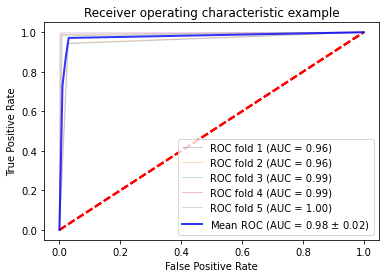

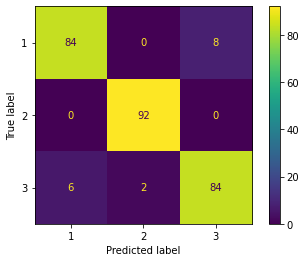

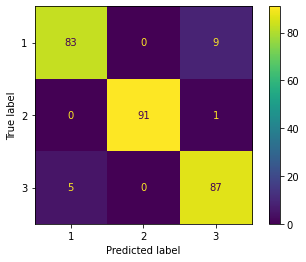

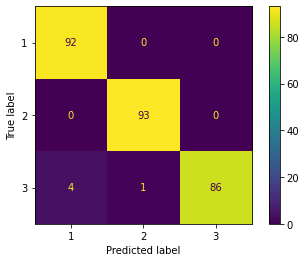

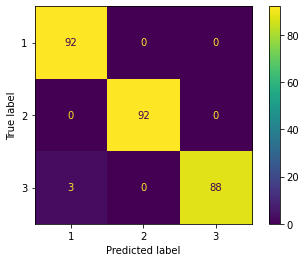

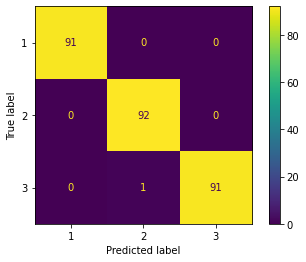

In [11]:
X = pd.DataFrame(X.values, columns=None)
Y = pd.DataFrame(Y.values, columns=None)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
cm = []
#RBF
# C=10, Gamma=1
split2 = skf.split(X, Y)
accuracy_train,accuracy_test,sensitivity,precision,f1score=[],[],[],[],[]
sensitivity_tr,precision_tr,f1score_tr=[],[],[]
i = 1
print("One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)")
for fold_no, (train_index2, test_index2) in enumerate(split2):
    #Split Train-Test Data
    print("\nSPLIT NO. {}".format(fold_no+1))
    X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2]
    Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
#     Y_train2=label_binarize(Y_train2, classes=np.unique(Y))
#     Y_test2=label_binarize(Y_test2, classes=np.unique(Y))
    #Building the model
    RFSVM_fit(X_train2, Y_train2,100)
    y_pred_clfOAA2 = RFSVM_predict(X_test2)
    #Confusion matrix in data training
    y_pred_clfOAA2_train = RFSVM_predict(X_train2)
    y_pred_clfOAA2 = np.round(y_pred_clfOAA2)
    y_pred_clfOAA2_train = np.round(y_pred_clfOAA2_train)
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    #Confusion matrix in data testing
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    cm.append(cm_clfOAA2)
    sk_report_clfOAA2_tr = classification_report(digits=6,y_true=Y_train2, y_pred=y_pred_clfOAA2_train) 
    sk_report_clfOAA2 = classification_report(digits=6, y_true=Y_test2,y_pred=y_pred_clfOAA2)
    # Compute ROC curve and area the curve
    Y_test2=label_binarize(Y_test2, classes=np.unique(Y))
    y_pred_clfOAA2=label_binarize(y_pred_clfOAA2, classes=np.unique(Y))
    fpr, tpr, thresholds = roc_curve(Y_test2.ravel(),y_pred_clfOAA2.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    print("*DATA TRAINING*")
    print("Classification Report:\n",sk_report_clfOAA2_tr)
    print("*DATA TESTING*")
    print("Classification Report:\n",sk_report_clfOAA2)
        
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
for fold_no in range(len(cm)):
    cm_display2 = ConfusionMatrixDisplay(cm[fold_no],
    display_labels=['1','2','3']).plot()

One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)

SPLIT NO. 1


<ipython-input-12-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   0.997297  1.000000  0.998647       369
         2.0   1.000000  0.997268  0.998632       366

    accuracy                       0.999093      1102
   macro avg   0.999099  0.999089  0.999093      1102
weighted avg   0.999095  0.999093  0.999093      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.955056  0.923913  0.939227        92
         1.0   0.978723  1.000000  0.989247        92
         2.0   0.924731  0.934783  0.929730        92

    accuracy                       0.952899       276
   macro avg   0.952837  0.952899  0.952735       276
weighted avg   0.952837  0.952899  0.952735       276


SPLIT NO. 2


<ipython-input-12-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.989011  0.980926  0.984952       367
         1.0   0.994609  1.000000  0.997297       369
         2.0   0.980926  0.983607  0.982265       366

    accuracy                       0.988203      1102
   macro avg   0.988182  0.988178  0.988171      1102
weighted avg   0.988200  0.988203  0.988193      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.954545  0.913043  0.933333        92
         1.0   1.000000  0.989130  0.994536        92
         2.0   0.907216  0.956522  0.931217        92

    accuracy                       0.952899       276
   macro avg   0.953921  0.952899  0.953029       276
weighted avg   0.953921  0.952899  0.953029       276


SPLIT NO. 3


<ipython-input-12-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.983425  0.970027  0.976680       367
         1.0   0.994580  0.997283  0.995929       368
         2.0   0.967655  0.978202  0.972900       367

    accuracy                       0.981851      1102
   macro avg   0.981887  0.981837  0.981837      1102
weighted avg   0.981898  0.981851  0.981849      1102

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.968421  1.000000  0.983957        92
         1.0   0.989362  1.000000  0.994652        93
         2.0   1.000000  0.956044  0.977528        91

    accuracy                       0.985507       276
   macro avg   0.985928  0.985348  0.985379       276
weighted avg   0.985889  0.985507  0.985441       276


SPLIT NO. 4


<ipython-input-12-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.988950  0.975477  0.982167       367
         1.0   0.994609  1.000000  0.997297       369
         2.0   0.975676  0.983651  0.979647       367

    accuracy                       0.986401      1103
   macro avg   0.986412  0.986376  0.986371      1103
weighted avg   0.986427  0.986401  0.986390      1103

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.978723  1.000000  0.989247        92
         1.0   1.000000  1.000000  1.000000        92
         2.0   1.000000  0.978022  0.988889        91

    accuracy                       0.992727       275
   macro avg   0.992908  0.992674  0.992712       275
weighted avg   0.992882  0.992727  0.992726       275


SPLIT NO. 5


<ipython-input-12-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.997283  0.997283  0.997283       368
         1.0   0.997297  1.000000  0.998647       369
         2.0   0.997260  0.994536  0.995896       366

    accuracy                       0.997280      1103
   macro avg   0.997280  0.997273  0.997275      1103
weighted avg   0.997280  0.997280  0.997279      1103

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000        91
         1.0   0.989247  1.000000  0.994595        92
         2.0   1.000000  0.989130  0.994536        92

    accuracy                       0.996364       275
   macro avg   0.996416  0.996377  0.996377       275
weighted avg   0.996403  0.996364  0.996364       275



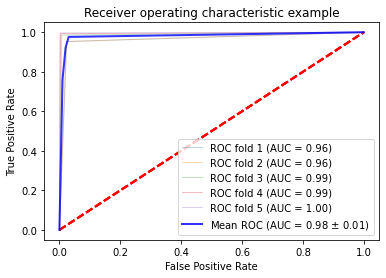

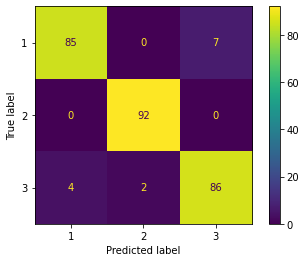

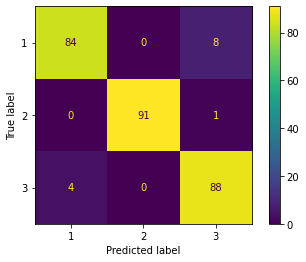

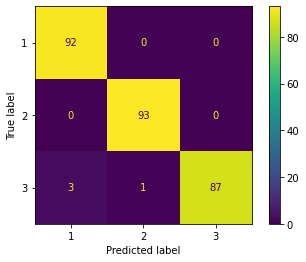

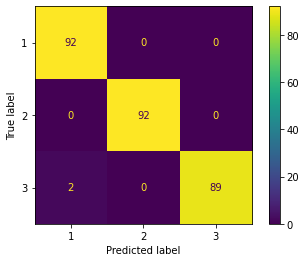

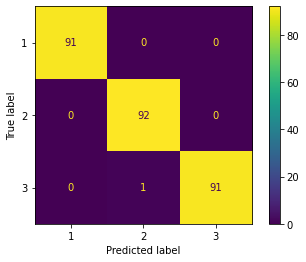

In [12]:
X = pd.DataFrame(X.values, columns=None)
Y = pd.DataFrame(Y.values, columns=None)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
cm = []
#RBF
# C=10, Gamma=1
split2 = skf.split(X, Y)
accuracy_train,accuracy_test,sensitivity,precision,f1score=[],[],[],[],[]
sensitivity_tr,precision_tr,f1score_tr=[],[],[]
i = 1
print("One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)")
for fold_no, (train_index2, test_index2) in enumerate(split2):
    #Split Train-Test Data
    print("\nSPLIT NO. {}".format(fold_no+1))
    X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2]
    Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
#     Y_train2=label_binarize(Y_train2, classes=np.unique(Y))
#     Y_test2=label_binarize(Y_test2, classes=np.unique(Y))
    #Building the model
    RFSVM_fit(X_train2, Y_train2,100)
    y_pred_clfOAA2 = RFSVM_predict(X_test2)
    #Confusion matrix in data training
    y_pred_clfOAA2_train = RFSVM_predict(X_train2)
    y_pred_clfOAA2 = np.round(y_pred_clfOAA2)
    y_pred_clfOAA2_train = np.round(y_pred_clfOAA2_train)
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    #Confusion matrix in data testing
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    cm.append(cm_clfOAA2)
    sk_report_clfOAA2_tr = classification_report(digits=6,y_true=Y_train2, y_pred=y_pred_clfOAA2_train) 
    sk_report_clfOAA2 = classification_report(digits=6, y_true=Y_test2,y_pred=y_pred_clfOAA2)
    # Compute ROC curve and area the curve
    Y_test2=label_binarize(Y_test2, classes=np.unique(Y))
    y_pred_clfOAA2=label_binarize(y_pred_clfOAA2, classes=np.unique(Y))
    fpr, tpr, thresholds = roc_curve(Y_test2.ravel(),y_pred_clfOAA2.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    print("*DATA TRAINING*")
    print("Classification Report:\n",sk_report_clfOAA2_tr)
    print("*DATA TESTING*")
    print("Classification Report:\n",sk_report_clfOAA2)
        
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
for fold_no in range(len(cm)):
    cm_display2 = ConfusionMatrixDisplay(cm[fold_no],
    display_labels=['1','2','3']).plot()

Hybrid RF-SVM with kernel RBF

SPLIT NO. 1


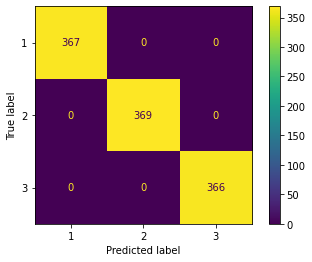

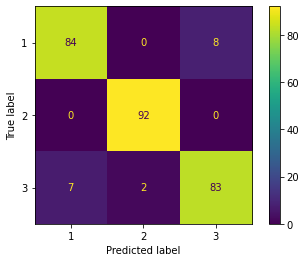

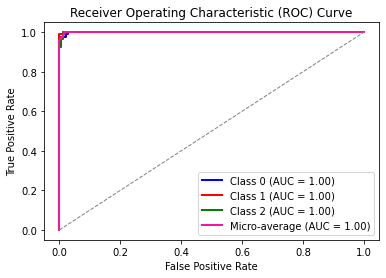

*DATA TRAINING*
Confusion Matrix:
 [[367   0   0]
 [  0 369   0]
 [  0   0 366]]
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       367
         1.0   1.000000  1.000000  1.000000       369
         2.0   1.000000  1.000000  1.000000       366

    accuracy                       1.000000      1102
   macro avg   1.000000  1.000000  1.000000      1102
weighted avg   1.000000  1.000000  1.000000      1102

*DATA TESTING*
Confusion Matrix:
 [[84  0  8]
 [ 0 92  0]
 [ 7  2 83]]
Classification Report:
               precision    recall  f1-score   support

         0.0   0.923077  0.913043  0.918033        92
         1.0   0.978723  1.000000  0.989247        92
         2.0   0.912088  0.902174  0.907104        92

    accuracy                       0.938406       276
   macro avg   0.937963  0.938406  0.938128       276
weighted avg   0.937963  0.938406  0.938128       276


SPLIT NO. 2


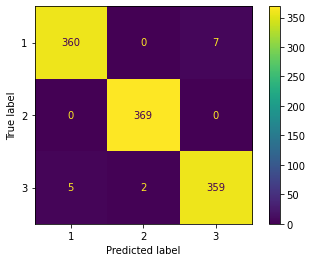

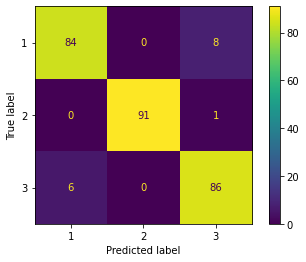

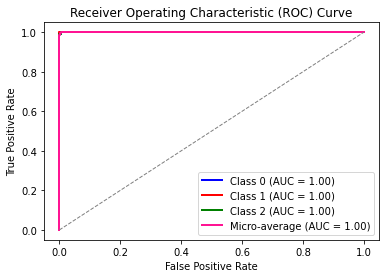

*DATA TRAINING*
Confusion Matrix:
 [[360   0   7]
 [  0 369   0]
 [  5   2 359]]
Classification Report:
               precision    recall  f1-score   support

         0.0   0.986301  0.980926  0.983607       367
         1.0   0.994609  1.000000  0.997297       369
         2.0   0.980874  0.980874  0.980874       366

    accuracy                       0.987296      1102
   macro avg   0.987262  0.987267  0.987259      1102
weighted avg   0.987281  0.987296  0.987283      1102

*DATA TESTING*
Confusion Matrix:
 [[84  0  8]
 [ 0 91  1]
 [ 6  0 86]]
Classification Report:
               precision    recall  f1-score   support

         0.0   0.933333  0.913043  0.923077        92
         1.0   1.000000  0.989130  0.994536        92
         2.0   0.905263  0.934783  0.919786        92

    accuracy                       0.945652       276
   macro avg   0.946199  0.945652  0.945800       276
weighted avg   0.946199  0.945652  0.945800       276


SPLIT NO. 3


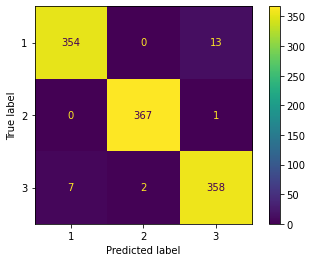

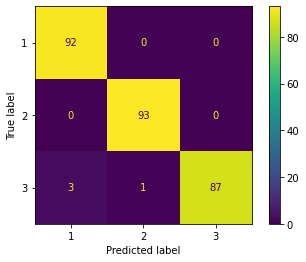

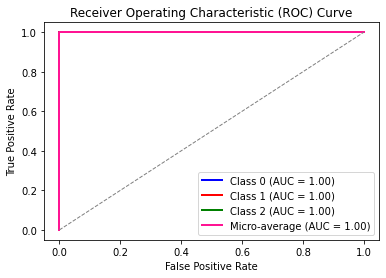

*DATA TRAINING*
Confusion Matrix:
 [[354   0  13]
 [  0 367   1]
 [  7   2 358]]
Classification Report:
               precision    recall  f1-score   support

         0.0   0.980609  0.964578  0.972527       367
         1.0   0.994580  0.997283  0.995929       368
         2.0   0.962366  0.975477  0.968877       367

    accuracy                       0.979129      1102
   macro avg   0.979185  0.979112  0.979111      1102
weighted avg   0.979199  0.979129  0.979127      1102

*DATA TESTING*
Confusion Matrix:
 [[92  0  0]
 [ 0 93  0]
 [ 3  1 87]]
Classification Report:
               precision    recall  f1-score   support

         0.0   0.968421  1.000000  0.983957        92
         1.0   0.989362  1.000000  0.994652        93
         2.0   1.000000  0.956044  0.977528        91

    accuracy                       0.985507       276
   macro avg   0.985928  0.985348  0.985379       276
weighted avg   0.985889  0.985507  0.985441       276


SPLIT NO. 4


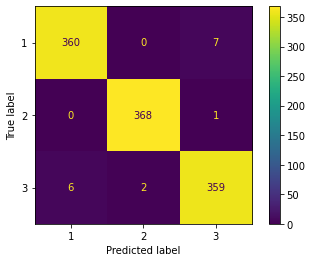

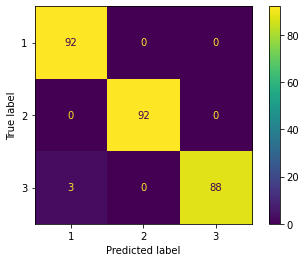

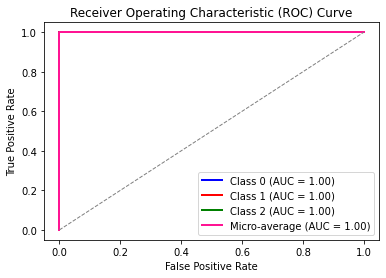

*DATA TRAINING*
Confusion Matrix:
 [[360   0   7]
 [  0 368   1]
 [  6   2 359]]
Classification Report:
               precision    recall  f1-score   support

         0.0   0.983607  0.980926  0.982265       367
         1.0   0.994595  0.997290  0.995940       369
         2.0   0.978202  0.978202  0.978202       367

    accuracy                       0.985494      1103
   macro avg   0.985468  0.985473  0.985469      1103
weighted avg   0.985484  0.985494  0.985488      1103

*DATA TESTING*
Confusion Matrix:
 [[92  0  0]
 [ 0 92  0]
 [ 3  0 88]]
Classification Report:
               precision    recall  f1-score   support

         0.0   0.968421  1.000000  0.983957        92
         1.0   1.000000  1.000000  1.000000        92
         2.0   1.000000  0.967033  0.983240        91

    accuracy                       0.989091       275
   macro avg   0.989474  0.989011  0.989066       275
weighted avg   0.989435  0.989091  0.989087       275


SPLIT NO. 5


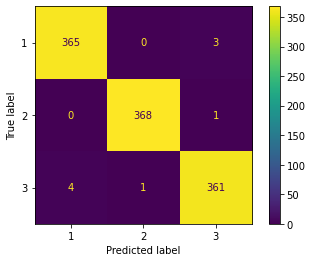

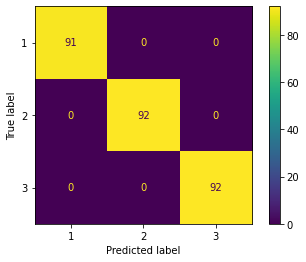

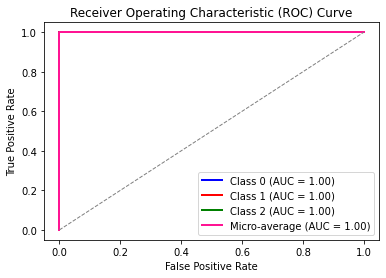

*DATA TRAINING*
Confusion Matrix:
 [[365   0   3]
 [  0 368   1]
 [  4   1 361]]
Classification Report:
               precision    recall  f1-score   support

         0.0   0.989160  0.991848  0.990502       368
         1.0   0.997290  0.997290  0.997290       369
         2.0   0.989041  0.986339  0.987688       366

    accuracy                       0.991840      1103
   macro avg   0.991830  0.991826  0.991827      1103
weighted avg   0.991840  0.991840  0.991839      1103

*DATA TESTING*
Confusion Matrix:
 [[91  0  0]
 [ 0 92  0]
 [ 0  0 92]]
Classification Report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000        91
         1.0   1.000000  1.000000  1.000000        92
         2.0   1.000000  1.000000  1.000000        92

    accuracy                       1.000000       275
   macro avg   1.000000  1.000000  1.000000       275
weighted avg   1.000000  1.000000  1.000000       275



In [12]:
X = pd.DataFrame(X.values, columns=None)
Y = pd.DataFrame(Y.values, columns=None)

split2 = skf.split(X, Y)
accuracy_train,accuracy_test,sensitivity,precision,f1score=[],[],[],[],[]
sensitivity_tr,precision_tr,f1score_tr=[],[],[]
i = 1
print("Hybrid RF-SVM with kernel RBF")
for fold_no, (train_index2, test_index2) in enumerate(split2):
    #Split Train-Test Data
    print("\nSPLIT NO. {}".format(fold_no+1))
    X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2]
    Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
    #Building the model
    RFSVM_fit(X_train2, Y_train2,100)
    y_pred_clfOAA2 = RFSVM_predict(X_test2)
    #Confusion matrix in data training
    y_pred_clfOAA2_train = RFSVM_predict(X_train2)
    cm_clfOAA2_tr=confusion_matrix(Y_train2,y_pred_clfOAA2_train)
    #Confusion matrix in data testing
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    sk_report_clfOAA2_tr = classification_report(digits=6,y_true=Y_train2, y_pred=y_pred_clfOAA2_train)
    sk_report_clfOAA2 = classification_report(digits=6, y_true=Y_test2,y_pred=y_pred_clfOAA2)
    cm_display2_train = ConfusionMatrixDisplay(cm_clfOAA2_tr, display_labels=['1','2','3']).plot()
    cm_display2 = ConfusionMatrixDisplay(cm_clfOAA2, display_labels=['1','2','3']).plot()
    
    y_test_bin = label_binarize(Y_test2, classes=np.unique(Y_train2))
    n_classes = y_test_bin.shape[1]
    # Compute predicted probabilities for each class
    y_score = RFSVM_predict_proba(X_test2)
    y_score = np.array(y_score)
    # Compute ROC curve and ROC AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Plot ROC curve for each class
    plt.figure()
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
    # Plot micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=2,
             label='Micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]))
    # Add random guessing line
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    # Set plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    # Show the plot
    plt.show()
    print("*DATA TRAINING*")
    print("Confusion Matrix:\n",cm_clfOAA2_tr)
    print("Classification Report:\n",sk_report_clfOAA2_tr)
    print("*DATA TESTING*")
    print("Confusion Matrix:\n",cm_clfOAA2)
    print("Classification Report:\n",sk_report_clfOAA2)
    i= i+1

Akurasi: 0.90 (+/- 0.05)
Akurasi model pada data uji:  0.96
Akurasi train:  0.9945305378304466
Akurasi test:  0.96


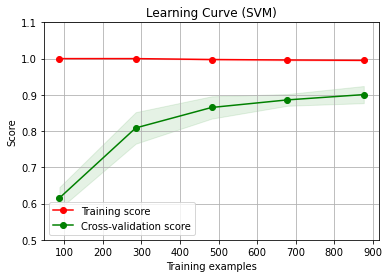

In [78]:

# Membuat model SVM dan Random Forest
svm_model = OneVsRestClassifier(SVC(kernel='rbf', C=1, gamma=2,
                                      probability=False,
                                      decision_function_shape='ovr'))
# rf_model = RandomForestClassifier()

# Menggabungkan model dengan teknik ensemble
# svm_rf_ensemble = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf_model)], voting='hard')
scores = cross_val_score(svm_model, X_train, y_train, cv=5)
# Menampilkan akurasi rata-rata dan standar deviasi dari cross-validation
print("Akurasi: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# Melatih model dengan data training
svm_model.fit(X_train, y_train)
# Memprediksi kelas pada data uji
y_pred = svm_model.predict(X_test)
# Menghitung akurasi model pada data uji
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model pada data uji: ", accuracy)


# Menghitung akurasi model
accuracy_train = svm_model.score(X_train,y_train)
print("Akurasi train: ", accuracy_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Akurasi test: ", accuracy_test)


train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train, y_train, cv=5)
# Menghitung skor rata-rata dan standar deviasi dari skor pada data training dan data uji
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Membuat plot learning curve
plt.figure()
plt.title("Learning Curve (SVM)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0.5, 1.1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [81]:
a = svm_model.predict(X_test)
# Menghitung akurasi model pada data uji
accuracy = accuracy_score(y_test, a)
print(accuracy)

0.96


In [82]:
cross_val_score(svm_model, X, Y, cv=5).mean()

0.9293855341738553

C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\sklearn\multiclass.py:77: UserWarning: Label not 2.0 is present in all training examples.
  warnings.warn(


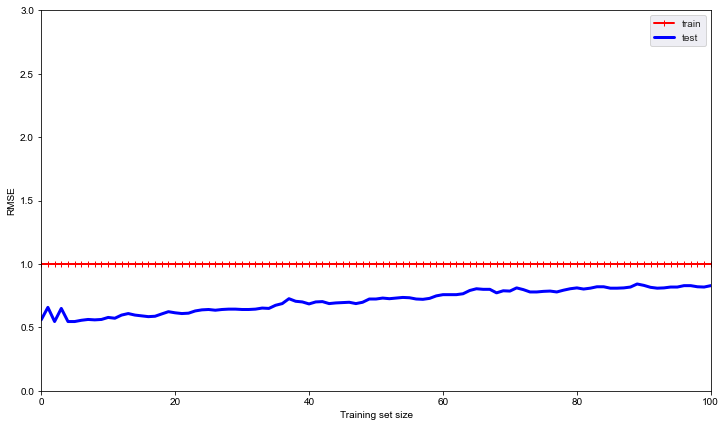

In [83]:
plot_learning_curve(svm_model, X_train, y_train)

In [54]:
RF = RandomForestClassifier() 
RF = RF.fit(X,Y)

<ipython-input-54-0953ad76a8d3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF = RF.fit(X,Y)


In [55]:
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)

In [56]:
indices = np.argsort(std)[::-1]

In [57]:
print("Feature Rank:")

for i in range(X.shape[1]):
    print("%d. Feature %d (%f)" 
          % (i + 1, indices[i], std[indices[i]]))

Feature Rank:
1. Feature 2 (0.056720)
2. Feature 1 (0.044115)
3. Feature 11 (0.039886)
4. Feature 0 (0.035102)
5. Feature 8 (0.033817)
6. Feature 13 (0.024830)
7. Feature 6 (0.022809)
8. Feature 5 (0.021962)
9. Feature 3 (0.021086)
10. Feature 4 (0.017857)
11. Feature 12 (0.017171)
12. Feature 14 (0.016987)
13. Feature 7 (0.014788)
14. Feature 10 (0.007208)
15. Feature 9 (0.001662)


In [58]:
X

Usia        RR      SpO2  Tekanan Darah Atas      Suhu      Nadi  \
0    -0.435815  0.697277 -0.138281            0.064727  0.109372 -0.128322   
1     1.044702  1.038804  0.055252           -0.920278  0.486241  0.226241   
2     0.606030  0.014221  0.082900            0.364512 -0.380557  0.606129   
3    -1.258325 -0.498071  0.069076           -0.877452  0.109372  0.986018   
4     1.209204 -0.668835  0.110547            0.107554 -0.267497 -0.736144   
...        ...       ...       ...                 ...       ...       ...   
1367  1.761248  1.892624 -0.120152           -0.883237  0.422912 -0.250905   
1368  0.389259 -0.344801  0.011533            0.395797  0.043987 -0.245532   
1369 -0.230591 -0.437443 -0.009859            0.231849 -0.012278  0.448402   
1370  0.867320 -0.465408 -0.360133           -0.759966 -0.070210  0.389542   
1371 -0.036892  2.241804 -0.136571            0.916420 -0.218801  0.474372   

      Jenis Kelamin  Diabetes Melitus  Hipertensi  Gagal Ginjal Kronis  \
0          1.000000          0.000000    0.000000                  0.0   
1          0.000000          1.000000    1.000000                  0.0   
2          1.000000          0.000000    0.000000                  0.0   
3          1.000000          0.000000    0.000000                  0.0   
4          1.000000          0.000000    0.000000                  0.0   
...             ...               ...         ...                  ...   
1367       0.915980          0.000000    0.000000                  0.0   
1368       0.000000          0.209353    1.000000                  0.0   
1369       1.000000          0.000000    0.322480                  0.0   
1370       1.000000          0.000000    0.595638                  0.0   
1371       0.646058          0.000000    0.353942                  0.0   

      Penyakit Jantung     Sesak  Batuk     Pilek   Anosmia  
0                  0.0  1.000000    1.0  1.000000  0.000000  
1                  0.0  0.000000    0.0  0.000000  0.000000  
2                  1.0  0.000000    0.0  0.000000  0.000000  
3                  0.0  0.000000    1.0  0.000000  0.000000  
4                  0.0  0.000000    0.0  0.000000  0.000000  
...                ...       ...    ...       ...       ...  
1367               0.0  1.000000    1.0  1.000000  0.000000  
1368               0.0  0.790647    1.0  0.209353  0.000000  
1369               0.0  1.000000    1.0  1.000000  0.677520  
1370               0.0  0.404362    1.0  0.000000  0.595638  
1371               0.0  1.000000    1.0  0.000000  0.000000  

[1372 rows x 15 columns]

In [16]:
dt=pd.read_excel("C:/Users/LENOVO/OneDrive/Dokumen/ta/FILE COVID UPDATE TERBARU - Copy.xlsx")

In [17]:
# Replace missing values with mean for numerical columns
numerical_cols = dt.select_dtypes(include='number').columns
dt[numerical_cols] = dt[numerical_cols].fillna(dt[numerical_cols].mean())

# Replace missing values with mode for categorical columns
categorical_cols = dt.select_dtypes(include='object').columns
for col in categorical_cols:
    dt[col].fillna(dt[col].mode()[0], inplace=True)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tingkat Keparahan    668 non-null    object 
 1   Usia                 668 non-null    float64
 2   Jenis Kelamin        668 non-null    object 
 3   Diabetes Melitus     668 non-null    object 
 4   Hipertensi           668 non-null    object 
 5   Gagal Ginjal Kronis  668 non-null    object 
 6   Penyakit Jantung     668 non-null    object 
 7   Sesak                668 non-null    object 
 8   RR                   668 non-null    float64
 9   SpO2                 668 non-null    float64
 10  Batuk                668 non-null    object 
 11  Tekanan Darah Atas   668 non-null    float64
 12  Suhu                 668 non-null    float64
 13  Nadi                 668 non-null    float64
 14  Pilek                668 non-null    object 
 15  Anosmia              668 non-null    obj

In [18]:
# dt=dt.iloc[:200,:]
# dt.info()

In [19]:
# Create a dictionary to map the labels
label_mapping = {'Meninggal': 0, 'Risiko Berat': 1, 'Risiko Rendah': 2}
# Apply the mapping using the map() function
dt['Tingkat Keparahan'] = dt['Tingkat Keparahan'].map(label_mapping)

# Create a dictionary to map the labels
label_mapping = {'Perempuan': 0, 'Laki-laki': 1}
# Apply the mapping using the map() function
dt['Jenis Kelamin'] = dt['Jenis Kelamin'].map(label_mapping)

# Create a dictionary to map the labels
label_mapping = {'Tidak': 0, 'Ya': 1}
# Apply the mapping using the map() function
str_column=['Diabetes Melitus', 'Hipertensi', 'Gagal Ginjal Kronis', 'Penyakit Jantung', 'Sesak', 'Batuk', 'Pilek', 'Anosmia']
for i in str_column:
    dt[i] = dt[i].map(label_mapping)

In [20]:
dt

Tingkat Keparahan  Usia  Jenis Kelamin  Diabetes Melitus  Hipertensi  \
0                    0  38.0              1                 0           0   
1                    0  65.0              0                 1           1   
2                    2  57.0              1                 0           0   
3                    2  23.0              1                 0           0   
4                    2  68.0              1                 0           0   
..                 ...   ...            ...               ...         ...   
663                  2   1.0              1                 0           0   
664                  2  24.0              0                 0           0   
665                  2  23.0              1                 0           0   
666                  2   1.0              1                 0           0   
667                  2  29.0              1                 0           0   

     Gagal Ginjal Kronis  Penyakit Jantung  Sesak         RR       SpO2  \
0                      0                 0      1  28.000000  89.000000   
1                      0                 0      0  30.000000  96.000000   
2                      0                 1      0  24.000000  97.000000   
3                      0                 0      0  21.000000  96.500000   
4                      0                 0      0  20.000000  98.000000   
..                   ...               ...    ...        ...        ...   
663                    0                 0      0  23.829421  92.766407   
664                    0                 0      0  23.829421  92.766407   
665                    0                 0      0  23.829421  99.000000   
666                    0                 0      0  30.000000  95.000000   
667                    0                 0      0  23.829421  92.766407   

     Batuk  Tekanan Darah Atas       Suhu        Nadi  Pilek  Anosmia  
0        1          130.000000  37.000000   96.000000      1        0  
1        0          107.000000  38.000000  110.000000      0        0  
2        0          137.000000  35.700000  125.000000      0        0  
3        1          108.000000  37.000000  140.000000      0        0  
4        0          131.000000  36.000000   72.000000      0        0  
..     ...                 ...        ...         ...    ...      ...  
663      0          129.017572  36.689092   99.322414      0        0  
664      1          129.017572  37.900000   99.322414      0        0  
665      0          129.017572  36.689092   99.322414      0        0  
666      1          129.017572  36.700000   99.322414      0        0  
667      1          129.017572  36.689092   99.322414      0        0  

[668 rows x 16 columns]

In [21]:
dt=dt.astype(float)
num_col=['Usia', 'RR', 'SpO2', 'Tekanan Darah Atas', 'Suhu', 'Nadi']
for i in num_col:
    dt[i]=((dt[i]) - min(dt[i])) / (max(dt[i]) - min(dt[i]))
#     dt[i]=(dt[i] - np.mean(dt[i]))/np.std(dt[i])
dt

Tingkat Keparahan      Usia  Jenis Kelamin  Diabetes Melitus  Hipertensi  \
0                  0.0  0.422222            1.0               0.0         0.0   
1                  0.0  0.722222            0.0               1.0         1.0   
2                  2.0  0.633333            1.0               0.0         0.0   
3                  2.0  0.255556            1.0               0.0         0.0   
4                  2.0  0.755556            1.0               0.0         0.0   
..                 ...       ...            ...               ...         ...   
663                2.0  0.011111            1.0               0.0         0.0   
664                2.0  0.266667            0.0               0.0         0.0   
665                2.0  0.255556            1.0               0.0         0.0   
666                2.0  0.011111            1.0               0.0         0.0   
667                2.0  0.322222            1.0               0.0         0.0   

     Gagal Ginjal Kronis  Penyakit Jantung  Sesak        RR      SpO2  Batuk  \
0                    0.0               0.0    1.0  0.314286  0.830769    1.0   
1                    0.0               0.0    0.0  0.371429  0.938462    0.0   
2                    0.0               1.0    0.0  0.200000  0.953846    0.0   
3                    0.0               0.0    0.0  0.114286  0.946154    1.0   
4                    0.0               0.0    0.0  0.085714  0.969231    0.0   
..                   ...               ...    ...       ...       ...    ...   
663                  0.0               0.0    0.0  0.195126  0.888714    0.0   
664                  0.0               0.0    0.0  0.195126  0.888714    1.0   
665                  0.0               0.0    0.0  0.195126  0.984615    0.0   
666                  0.0               0.0    0.0  0.371429  0.923077    1.0   
667                  0.0               0.0    0.0  0.195126  0.888714    1.0   

     Tekanan Darah Atas      Suhu      Nadi  Pilek  Anosmia  
0              0.411392  0.636364  0.600000    1.0      0.0  
1              0.265823  0.727273  0.687500    0.0      0.0  
2              0.455696  0.518182  0.781250    0.0      0.0  
3              0.272152  0.636364  0.875000    0.0      0.0  
4              0.417722  0.545455  0.450000    0.0      0.0  
..                  ...       ...       ...    ...      ...  
663            0.405175  0.608099  0.620765    0.0      0.0  
664            0.405175  0.718182  0.620765    0.0      0.0  
665            0.405175  0.608099  0.620765    0.0      0.0  
666            0.405175  0.609091  0.620765    0.0      0.0  
667            0.405175  0.608099  0.620765    0.0      0.0  

[668 rows x 16 columns]

In [22]:
from imblearn.combine import SMOTETomek
from collections import Counter

Y = dt['Tingkat Keparahan']
X = dt.drop(['Tingkat Keparahan'],axis=1)
counter = Counter(Y)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=123)
X, Y = smtom.fit_resample(X, Y)

counter = Counter(Y)
print('After',counter)

Before Counter({2.0: 462, 0.0: 176, 1.0: 30})
After Counter({1.0: 461, 0.0: 447, 2.0: 446})


In [23]:
from sklearn.model_selection import StratifiedKFold

#Split dataset
skf = StratifiedKFold(n_splits=5) #10, 15, 20, 30
skf.get_n_splits(X, Y)
print(skf)

split2 = skf.split(X, Y)
for n, (train_index2, test_index2) in enumerate(split2):
    print("\nSPLIT NO. {}".format(n+1))
    print("TRAINING SET SIZE: {}".format(np.round(len(train_index2))),"\tTEST SET SIZE: {}".format(np.round(len(test_index2))))
    print("TRAIN:", train_index2, "\nTEST:", test_index2)
split2 = skf.split(X, Y)
for n, (train_index2, test_index2) in enumerate(split2):

    #Split Train-Test Data
    print("\nSPLIT NO. {}".format(n+1))
X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2] 
print("X_train:{}".format(X_train2.shape),"\tX_test:{}".format(X_test2.shape)) 
Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
print("Y_train:{}".format(Y_train2.shape),"\t\tY_test:{}".format(Y_test2.shape))
print("Labels Y_train:\n{}".format(Y_train2.value_counts()))
print("Labels Y_test:\n{}".format(Y_test2.value_counts())) 

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

SPLIT NO. 1
TRAINING SET SIZE: 1083 	TEST SET SIZE: 271
TRAIN: [ 110  111  112 ... 1351 1352 1353] 
TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 186 194 195 196 197 198 199 210 233 234 235 236 237 238 239 240 241
 242 243 254 267 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 336 338 339 340 341 342 343 344 345 348 362 369
 370 371 378 391 392 393 394 400 401 404 405 406 427 449 450 489 502 515
 517 546 551 561 576 578 588

One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)

SPLIT NO. 1


<ipython-input-12-ff4a777f3612>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.909091  0.952381  0.930233       357
         1.0   0.957784  0.983740  0.970588       369
         2.0   0.963636  0.890756  0.925764       357

    accuracy                       0.942752      1083
   macro avg   0.943504  0.942292  0.942195      1083
weighted avg   0.943662  0.942752  0.942510      1083

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.820225  0.811111  0.815642        90
         1.0   0.927083  0.967391  0.946809        92
         2.0   0.790698  0.764045  0.777143        89

    accuracy                       0.848708       271
   macro avg   0.846002  0.847516  0.846531       271
weighted avg   0.846804  0.848708  0.847527       271


SPLIT NO. 2


<ipython-input-12-ff4a777f3612>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.918421  0.977591  0.947083       357
         1.0   0.968085  0.986450  0.977181       369
         2.0   0.969419  0.887955  0.926901       357

    accuracy                       0.951062      1083
   macro avg   0.951975  0.950665  0.950388      1083
weighted avg   0.952154  0.951062  0.950685      1083

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.772277  0.866667  0.816754        90
         1.0   0.900000  0.978261  0.937500        92
         2.0   0.914286  0.719101  0.805031        89

    accuracy                       0.856089       271
   macro avg   0.862188  0.854676  0.853095       271
weighted avg   0.862274  0.856089  0.853895       271


SPLIT NO. 3


<ipython-input-12-ff4a777f3612>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.905660  0.938547  0.921811       358
         1.0   0.947917  0.986450  0.966799       369
         2.0   0.939024  0.865169  0.900585       356

    accuracy                       0.930748      1083
   macro avg   0.930867  0.930055  0.929732      1083
weighted avg   0.931025  0.930748  0.930162      1083

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.793814  0.865169  0.827957        89
         1.0   0.927083  0.967391  0.946809        92
         2.0   0.897436  0.777778  0.833333        90

    accuracy                       0.870849       271
   macro avg   0.872778  0.870113  0.869366       271
weighted avg   0.873470  0.870849  0.870091       271


SPLIT NO. 4


<ipython-input-12-ff4a777f3612>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.896277  0.941341  0.918256       358
         1.0   0.957784  0.986413  0.971888       368
         2.0   0.945122  0.868347  0.905109       357

    accuracy                       0.932595      1083
   macro avg   0.933061  0.932034  0.931751      1083
weighted avg   0.933278  0.932595  0.932146      1083

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.845361  0.921348  0.881720        89
         1.0   0.902913  1.000000  0.948980        93
         2.0   0.943662  0.752809  0.837500        89

    accuracy                       0.892989       271
   macro avg   0.897312  0.891386  0.889400       271
weighted avg   0.897394  0.892989  0.890279       271


SPLIT NO. 5


<ipython-input-12-ff4a777f3612>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.909333  0.952514  0.930423       358
         1.0   0.965699  0.991870  0.978610       369
         2.0   0.963636  0.890756  0.925764       357

    accuracy                       0.945572      1084
   macro avg   0.946223  0.945047  0.944932      1084
weighted avg   0.946405  0.945572  0.945292      1084

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.864583  0.932584  0.897297        89
         1.0   0.920000  1.000000  0.958333        92
         2.0   0.932432  0.775281  0.846626        89

    accuracy                       0.903704       270
   macro avg   0.905672  0.902622  0.900752       270
weighted avg   0.905831  0.903704  0.901392       270



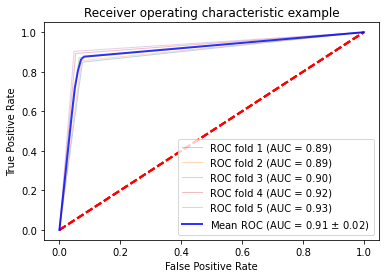

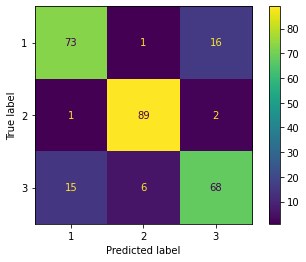

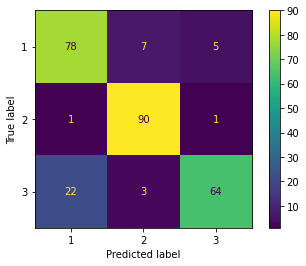

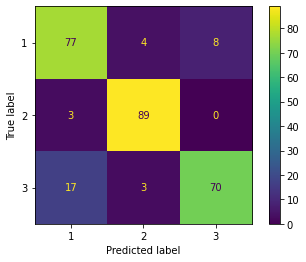

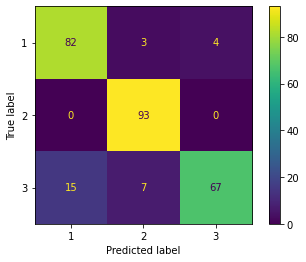

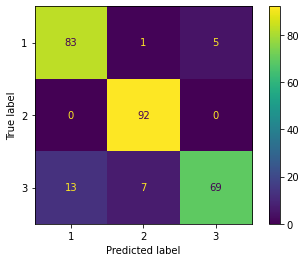

In [12]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
cm = []
#RBF
# C=10, Gamma=1
split2 = skf.split(X, Y)
accuracy_train,accuracy_test,sensitivity,precision,f1score=[],[],[],[],[]
sensitivity_tr,precision_tr,f1score_tr=[],[],[]
i = 1
print("One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)")
for fold_no, (train_index2, test_index2) in enumerate(split2):
    #Split Train-Test Data
    print("\nSPLIT NO. {}".format(fold_no+1))
    X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2]
    Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
#     Y_train2=label_binarize(Y_train2, classes=np.unique(Y))
#     Y_test2=label_binarize(Y_test2, classes=np.unique(Y))
    #Building the model
    clfOAA2 = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=1,
                                      probability=True,
                                      decision_function_shape='ovr')) 
    modelclfOAA2 = clfOAA2.fit(X_train2, Y_train2)
    #Accuracy the data testing
    y_pred_clfOAA2 = modelclfOAA2.predict(X_test2)
    y_pred_clfOAA2 = np.round(y_pred_clfOAA2)
    y_pred_clfOAA2_train = modelclfOAA2.predict(X_train2)
    y_pred_clfOAA2_train = np.round(y_pred_clfOAA2_train)
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    cm.append(cm_clfOAA2)
    sk_report_clfOAA2_tr = classification_report(digits=6,y_true=Y_train2, y_pred=y_pred_clfOAA2_train) 
    sk_report_clfOAA2 = classification_report(digits=6, y_true=Y_test2,y_pred=y_pred_clfOAA2)
    # Compute ROC curve and area the curve
    Y_test2=label_binarize(Y_test2, classes=np.unique(Y))
    y_pred_clfOAA2=label_binarize(y_pred_clfOAA2, classes=np.unique(Y))
    fpr, tpr, thresholds = roc_curve(Y_test2.ravel(),y_pred_clfOAA2.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    print("*DATA TRAINING*")
    print("Classification Report:\n",sk_report_clfOAA2_tr)
    print("*DATA TESTING*")
    print("Classification Report:\n",sk_report_clfOAA2)
        
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
for fold_no in range(len(cm)):
    cm_display2 = ConfusionMatrixDisplay(cm[fold_no],
    display_labels=['1','2','3']).plot()

One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)

SPLIT NO. 1


<ipython-input-26-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.905263  0.963585  0.933514       357
         1.0   0.952880  0.986450  0.969374       369
         2.0   0.971963  0.873950  0.920354       357

    accuracy                       0.941828      1083
   macro avg   0.943368  0.941328  0.941081      1083
weighted avg   0.943474  0.941828  0.941394      1083

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.852632  0.900000  0.875676        90
         1.0   0.946809  0.967391  0.956989        92
         2.0   0.878049  0.808989  0.842105        89

    accuracy                       0.892989       271
   macro avg   0.892496  0.892127  0.891590       271
weighted avg   0.892950  0.892989  0.892255       271


SPLIT NO. 2


<ipython-input-26-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.902116  0.955182  0.927891       357
         1.0   0.960317  0.983740  0.971888       369
         2.0   0.951070  0.871148  0.909357       357

    accuracy                       0.937211      1083
   macro avg   0.937835  0.936690  0.936378      1083
weighted avg   0.938084  0.937211  0.936772      1083

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.852632  0.900000  0.875676        90
         1.0   0.909091  0.978261  0.942408        92
         2.0   0.948052  0.820225  0.879518        89

    accuracy                       0.900369       271
   macro avg   0.903258  0.899495  0.899201       271
weighted avg   0.903136  0.900369  0.899592       271


SPLIT NO. 3


<ipython-input-26-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.886842  0.941341  0.913279       358
         1.0   0.942857  0.983740  0.962865       369
         2.0   0.946541  0.845506  0.893175       356

    accuracy                       0.924284      1083
   macro avg   0.925413  0.923529  0.923106      1083
weighted avg   0.925552  0.924284  0.923565      1083

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.895833  0.966292  0.929730        89
         1.0   0.978495  0.989130  0.983784        92
         2.0   0.975610  0.888889  0.930233        90

    accuracy                       0.948339       271
   macro avg   0.949979  0.948104  0.947915       271
weighted avg   0.950389  0.948339  0.948247       271


SPLIT NO. 4


<ipython-input-26-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.880519  0.946927  0.912517       358
         1.0   0.947368  0.978261  0.962567       368
         2.0   0.952830  0.848739  0.897778       357

    accuracy                       0.925208      1083
   macro avg   0.926906  0.924643  0.924287      1083
weighted avg   0.927071  0.925208  0.924665      1083

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.924731  0.966292  0.945055        89
         1.0   0.948980  1.000000  0.973822        93
         2.0   0.975000  0.876404  0.923077        89

    accuracy                       0.948339       271
   macro avg   0.949570  0.947566  0.947318       271
weighted avg   0.949562  0.948339  0.947709       271


SPLIT NO. 5


<ipython-input-26-cfb045596baf>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


*DATA TRAINING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.890625  0.955307  0.921833       358
         1.0   0.955263  0.983740  0.969292       369
         2.0   0.959375  0.859944  0.906942       357

    accuracy                       0.933579      1084
   macro avg   0.935088  0.932997  0.932689      1084
weighted avg   0.935270  0.933579  0.933084      1084

*DATA TESTING*
Classification Report:
               precision    recall  f1-score   support

         0.0   0.895833  0.966292  0.929730        89
         1.0   0.947368  0.978261  0.962567        92
         2.0   0.949367  0.842697  0.892857        89

    accuracy                       0.929630       270
   macro avg   0.930856  0.929083  0.928385       270
weighted avg   0.931040  0.929630  0.928764       270



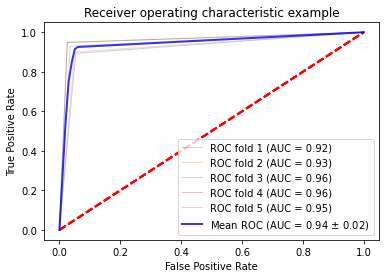

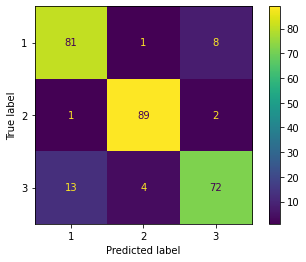

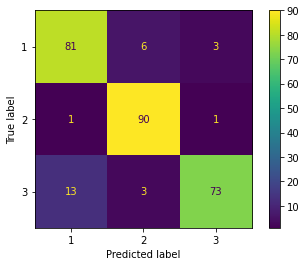

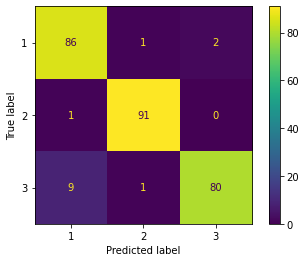

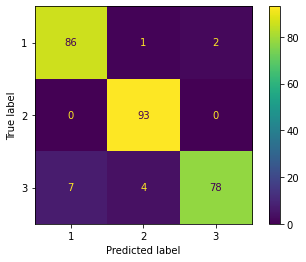

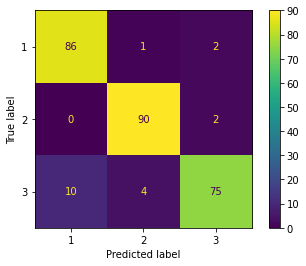

In [26]:
X = pd.DataFrame(X.values, columns=None)
Y = pd.DataFrame(Y.values, columns=None)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
cm = []
#RBF
# C=10, Gamma=1
split2 = skf.split(X, Y)
accuracy_train,accuracy_test,sensitivity,precision,f1score=[],[],[],[],[]
sensitivity_tr,precision_tr,f1score_tr=[],[],[]
i = 1
print("One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)")
for fold_no, (train_index2, test_index2) in enumerate(split2):
    #Split Train-Test Data
    print("\nSPLIT NO. {}".format(fold_no+1))
    X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2]
    Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
#     Y_train2=label_binarize(Y_train2, classes=np.unique(Y))
#     Y_test2=label_binarize(Y_test2, classes=np.unique(Y))
    #Building the model
    RFSVM_fit(X_train2, Y_train2,100)
    y_pred_clfOAA2 = RFSVM_predict(X_test2)
    #Confusion matrix in data training
    y_pred_clfOAA2_train = RFSVM_predict(X_train2)
    y_pred_clfOAA2 = np.round(y_pred_clfOAA2)
    y_pred_clfOAA2_train = np.round(y_pred_clfOAA2_train)
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    #Confusion matrix in data testing
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    cm.append(cm_clfOAA2)
    sk_report_clfOAA2_tr = classification_report(digits=6,y_true=Y_train2, y_pred=y_pred_clfOAA2_train) 
    sk_report_clfOAA2 = classification_report(digits=6, y_true=Y_test2,y_pred=y_pred_clfOAA2)
    # Compute ROC curve and area the curve
    Y_test2=label_binarize(Y_test2, classes=np.unique(Y))
    y_pred_clfOAA2=label_binarize(y_pred_clfOAA2, classes=np.unique(Y))
    fpr, tpr, thresholds = roc_curve(Y_test2.ravel(),y_pred_clfOAA2.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    print("*DATA TRAINING*")
    print("Classification Report:\n",sk_report_clfOAA2_tr)
    print("*DATA TESTING*")
    print("Classification Report:\n",sk_report_clfOAA2)
        
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
for fold_no in range(len(cm)):
    cm_display2 = ConfusionMatrixDisplay(cm[fold_no],
    display_labels=['1','2','3']).plot()

One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)

SPLIT NO. 1
[[4.24373953e-01 8.97841109e-04 5.74728206e-01]
 [7.27143752e-01 3.85835335e-04 2.72470413e-01]
 [7.00767698e-02 4.82545154e-05 9.29874976e-01]
 [9.05310811e-03 1.12726271e-02 9.79674265e-01]
 [3.19143272e-01 1.81350702e-04 6.80675377e-01]
 [8.52423428e-01 7.86558276e-05 1.47497916e-01]
 [5.41640478e-01 2.43010133e-04 4.58116512e-01]
 [1.38701355e-01 3.33835174e-06 8.61295306e-01]
 [5.61889470e-02 8.92026324e-04 9.42919027e-01]
 [6.39117342e-03 4.81430137e-05 9.93560684e-01]
 [1.83402508e-01 6.40865651e-03 8.10188835e-01]
 [5.11231837e-03 2.48858307e-05 9.94862796e-01]
 [3.15052548e-01 6.87017668e-03 6.78077275e-01]
 [4.59681955e-02 1.68237597e-02 9.37208045e-01]
 [2.92602339e-02 8.13748639e-01 1.56991127e-01]
 [4.56881676e-01 8.85187426e-04 5.42233137e-01]
 [8.13798592e-03 2.35252590e-05 9.91838489e-01]
 [1.64247602e-02 1.28642761e-03 9.82288812e-01]
 [4.48091756e-02 5.67525751e-04 9.54623299e-01]
 [6.38748777e-03 2.9101

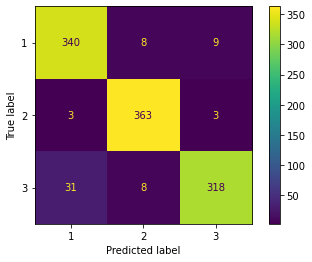

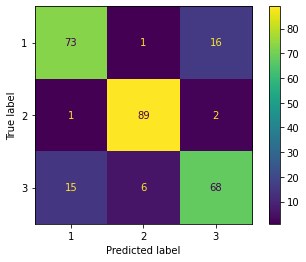

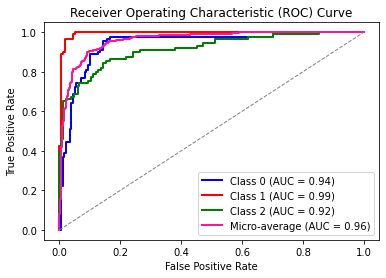

*DATA TRAINING*
Confusion Matrix:
 [[340   8   9]
 [  3 363   3]
 [ 31   8 318]]
Accuracy:  0.9427516158818098
macro Recall=  0.9422923641001115
macro F1 Score=  0.9421949951911301
Classification Report:
               precision    recall  f1-score   support

         0.0   0.909091  0.952381  0.930233       357
         1.0   0.957784  0.983740  0.970588       369
         2.0   0.963636  0.890756  0.925764       357

    accuracy                       0.942752      1083
   macro avg   0.943504  0.942292  0.942195      1083
weighted avg   0.943662  0.942752  0.942510      1083

*DATA TESTING*
Confusion Matrix:
 [[73  1 16]
 [ 1 89  2]
 [15  6 68]]
Accuracy for data test=  0.8487084870848709
macro Recall=  0.8475157864263873
macro F1 Score=  0.8465312752939046
Classification Report:
               precision    recall  f1-score   support

         0.0   0.820225  0.811111  0.815642        90
         1.0   0.927083  0.967391  0.946809        92
         2.0   0.790698  0.764045  0.77714

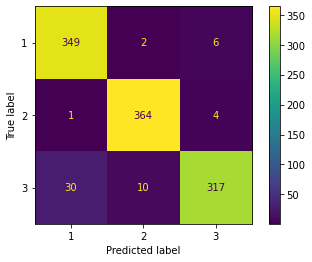

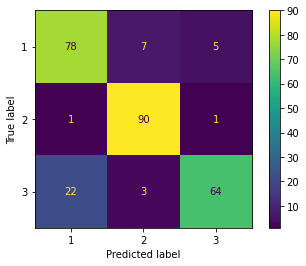

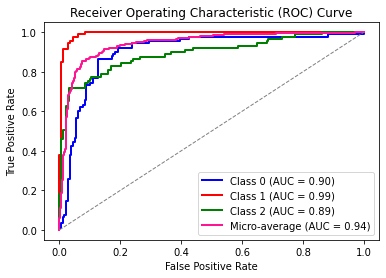

*DATA TRAINING*
Confusion Matrix:
 [[349   2   6]
 [  1 364   4]
 [ 30  10 317]]
Accuracy:  0.9469067405355494
macro Recall=  0.9506653609953467
macro F1 Score=  0.9503881869424345
Classification Report:
               precision    recall  f1-score   support

         0.0   0.918421  0.977591  0.947083       357
         1.0   0.968085  0.986450  0.977181       369
         2.0   0.969419  0.887955  0.926901       357

    accuracy                       0.951062      1083
   macro avg   0.951975  0.950665  0.950388      1083
weighted avg   0.952154  0.951062  0.950685      1083

*DATA TESTING*
Confusion Matrix:
 [[78  7  5]
 [ 1 90  1]
 [22  3 64]]
Accuracy for data test=  0.8523985239852399
macro Recall=  0.8546762199424632
macro F1 Score=  0.8530951244141504
Classification Report:
               precision    recall  f1-score   support

         0.0   0.772277  0.866667  0.816754        90
         1.0   0.900000  0.978261  0.937500        92
         2.0   0.914286  0.719101  0.80503

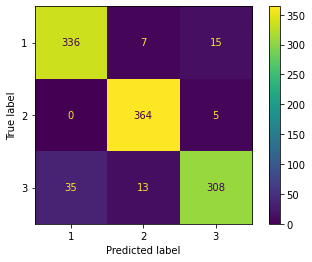

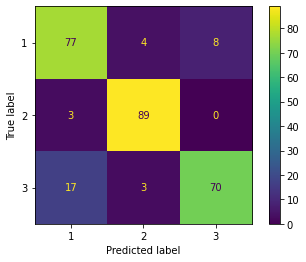

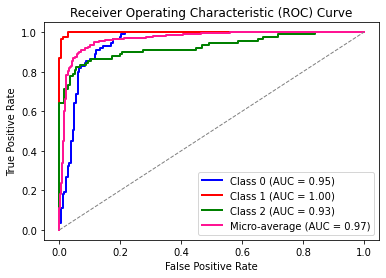

*DATA TRAINING*
Confusion Matrix:
 [[336   7  15]
 [  0 364   5]
 [ 35  13 308]]
Accuracy:  0.9415204678362573
macro Recall=  0.9300552966193357
macro F1 Score=  0.9297316545672051
Classification Report:
               precision    recall  f1-score   support

         0.0   0.905660  0.938547  0.921811       358
         1.0   0.947917  0.986450  0.966799       369
         2.0   0.939024  0.865169  0.900585       356

    accuracy                       0.930748      1083
   macro avg   0.930867  0.930055  0.929732      1083
weighted avg   0.931025  0.930748  0.930162      1083

*DATA TESTING*
Confusion Matrix:
 [[77  4  8]
 [ 3 89  0]
 [17  3 70]]
Accuracy for data test=  0.8585485854858549
macro Recall=  0.8701125404838156
macro F1 Score=  0.8693662777396476
Classification Report:
               precision    recall  f1-score   support

         0.0   0.793814  0.865169  0.827957        89
         1.0   0.927083  0.967391  0.946809        92
         2.0   0.897436  0.777778  0.83333

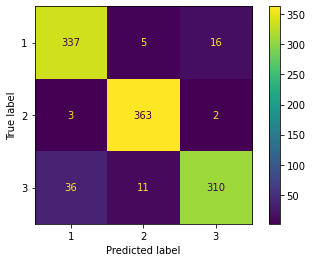

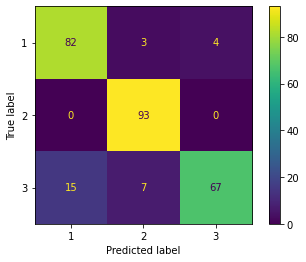

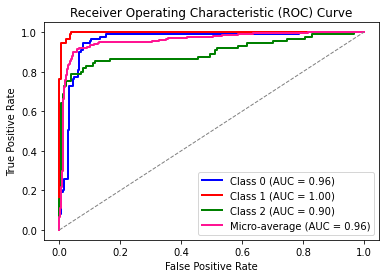

*DATA TRAINING*
Confusion Matrix:
 [[337   5  16]
 [  3 363   2]
 [ 36  11 310]]
Accuracy:  0.9392890120036934
macro Recall=  0.9320337215122466
macro F1 Score=  0.9317510566806962
Classification Report:
               precision    recall  f1-score   support

         0.0   0.896277  0.941341  0.918256       358
         1.0   0.957784  0.986413  0.971888       368
         2.0   0.945122  0.868347  0.905109       357

    accuracy                       0.932595      1083
   macro avg   0.933061  0.932034  0.931751      1083
weighted avg   0.933278  0.932595  0.932146      1083

*DATA TESTING*
Confusion Matrix:
 [[82  3  4]
 [ 0 93  0]
 [15  7 67]]
Accuracy for data test=  0.8671586715867159
macro Recall=  0.8913857677902621
macro F1 Score=  0.8894000073147538
Classification Report:
               precision    recall  f1-score   support

         0.0   0.845361  0.921348  0.881720        89
         1.0   0.902913  1.000000  0.948980        93
         2.0   0.943662  0.752809  0.83750

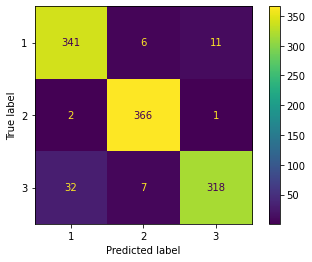

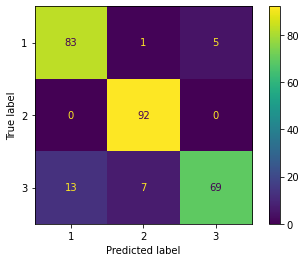

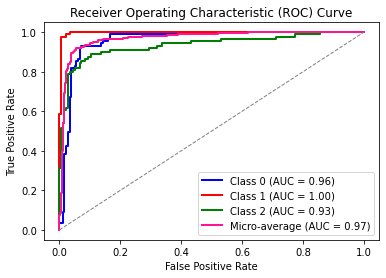

*DATA TRAINING*
Confusion Matrix:
 [[341   6  11]
 [  2 366   1]
 [ 32   7 318]]
Accuracy:  0.9405456007468661
macro Recall=  0.9450467292335474
macro F1 Score=  0.9449322457723515
Classification Report:
               precision    recall  f1-score   support

         0.0   0.909333  0.952514  0.930423       358
         1.0   0.965699  0.991870  0.978610       369
         2.0   0.963636  0.890756  0.925764       357

    accuracy                       0.945572      1084
   macro avg   0.946223  0.945047  0.944932      1084
weighted avg   0.946405  0.945572  0.945292      1084

*DATA TESTING*
Confusion Matrix:
 [[83  1  5]
 [ 0 92  0]
 [13  7 69]]
Accuracy for data test=  0.8744676780101134
macro Recall=  0.9026217228464418
macro F1 Score=  0.9007521325005988
Classification Report:
               precision    recall  f1-score   support

         0.0   0.864583  0.932584  0.897297        89
         1.0   0.920000  1.000000  0.958333        92
         2.0   0.932432  0.775281  0.84662

In [59]:

#RBF
# C=10, Gamma=1
split2 = skf.split(X, Y)
accuracy_train,accuracy_test,sensitivity,precision,f1score=[],[],[],[],[]
sensitivity_tr,precision_tr,f1score_tr=[],[],[]
i = 1
print("One Against All (OAA) - Kernel: RBF (C=10, Gamma=1)")
for fold_no, (train_index2, test_index2) in enumerate(split2):
    #Split Train-Test Data
    print("\nSPLIT NO. {}".format(fold_no+1))
    X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2]
    Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
    #Building the model
    clfOAA2 = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=1,
                                      probability=True,
                                      decision_function_shape='ovr')) 
    modelclfOAA2 = clfOAA2.fit(X_train2, Y_train2)
    #Accuracy of data training
    accuracy_train.append(modelclfOAA2.score(X_train2,Y_train2))
    #Accuracy the data testing
    y_pred_clfOAA2 = modelclfOAA2.predict(X_test2)
    accuracy_test.append(accuracy_score(Y_test2,y_pred_clfOAA2))
    #Confusion matrix in data training
    y_pred_clfOAA2_train = modelclfOAA2.predict(X_train2)
    cm_clfOAA2_tr=confusion_matrix(Y_train2,y_pred_clfOAA2_train)
    #Confusion matrix in data testing
    cm_clfOAA2=confusion_matrix(Y_test2,y_pred_clfOAA2)
    #Recall, Precision, F1Score in data training
    recall_clfOAA2_tr = recall_score(Y_train2,y_pred_clfOAA2_train,average='macro')
    f1score_clfOAA2_tr = f1_score(Y_train2,y_pred_clfOAA2_train,average='macro')
    #Recall, Precision, F1Score in data testing
    recall_clfOAA2 = recall_score(Y_test2,y_pred_clfOAA2,average='macro')
    f1score_clfOAA2 = f1_score(Y_test2,y_pred_clfOAA2,average='macro')
    acc_clfOAA2_train=np.mean(accuracy_train)
    acc_clfOAA2_test=np.mean(accuracy_test) 
    sk_report_clfOAA2_tr = classification_report(digits=6,y_true=Y_train2, y_pred=y_pred_clfOAA2_train) 
    sk_report_clfOAA2 = classification_report(digits=6, y_true=Y_test2,y_pred=y_pred_clfOAA2) 
    cm_display2_train = ConfusionMatrixDisplay(cm_clfOAA2_tr,
    display_labels=['1','2','3']).plot() 
    cm_display2 = ConfusionMatrixDisplay(cm_clfOAA2,
    display_labels=['1','2','3']).plot() 
    y_test_bin = label_binarize(Y_test2, classes=np.unique(Y_test2))
    n_classes = y_test_bin.shape[1]
    # Compute predicted probabilities for each class
    y_score = modelclfOAA2.predict_proba(X_test2)
    # Compute ROC curve and ROC AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Plot ROC curve for each class
    plt.figure()
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
    # Plot micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=2,
             label='Micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]))
    # Add random guessing line
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    # Set plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    # Show the plot
    plt.show()
    
    print("*DATA TRAINING*")
    print("Confusion Matrix:\n",cm_clfOAA2_tr)
    print("Accuracy: ", acc_clfOAA2_train)
    print("macro Recall= ",recall_clfOAA2_tr)
    print("macro F1 Score= ", f1score_clfOAA2_tr)
    print("Classification Report:\n",sk_report_clfOAA2_tr)
    print("*DATA TESTING*")
    print("Confusion Matrix:\n",cm_clfOAA2)
    print("Accuracy for data test= ", acc_clfOAA2_test)
    print("macro Recall= ",recall_clfOAA2)
    print("macro F1 Score= ", f1score_clfOAA2)
    print("Classification Report:\n",sk_report_clfOAA2)
    
    i= i+1

One Against One (OAO) - Kernel: RBF (C=1, Gamma=1)

SPLIT NO. 1
*DATA TRAINING*
Confusion Matrix:
 [[202  13   3]
 [  7 212   1]
 [  2   0 214]]
Accuracy:  0.9602446483180428
macro Recall=  0.9603275363214201
macro F1 Score=  0.9602363485654534
Classification Report:
               precision    recall  f1-score   support

           0   0.957346  0.926606  0.941725       218
           1   0.942222  0.963636  0.952809       220
           2   0.981651  0.990741  0.986175       216

    accuracy                       0.960245       654
   macro avg   0.960407  0.960328  0.960236       654
weighted avg   0.960286  0.960245  0.960134       654

*DATA TESTING*
Confusion Matrix:
 [[28  1 25]
 [ 4 42  9]
 [ 2  1 52]]
Accuracy for data test=  0.7439024390243902
macro Recall=  0.7425364758698092
macro F1 Score=  0.7408123791102513
Classification Report:
               precision    recall  f1-score   support

           0   0.823529  0.518519  0.636364        54
           1   0.954545  0.76363

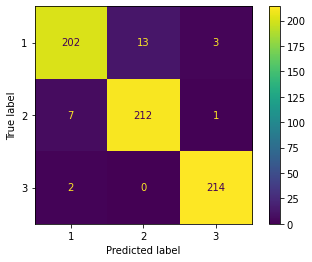

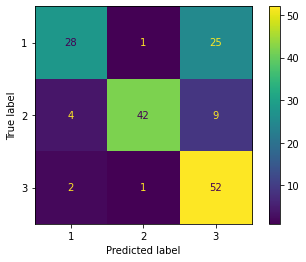

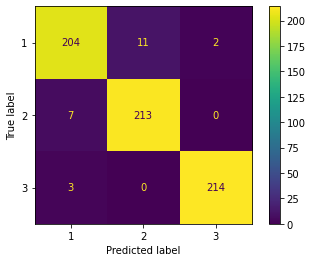

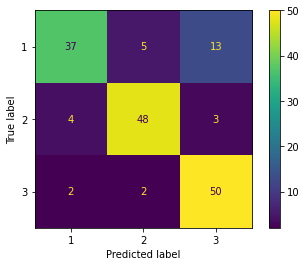

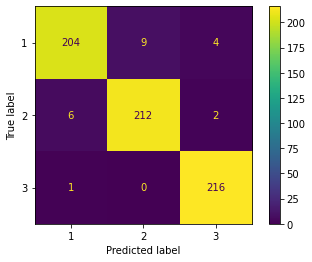

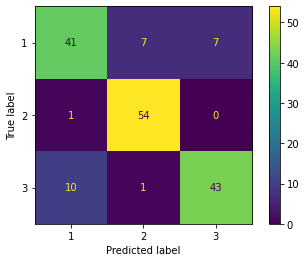

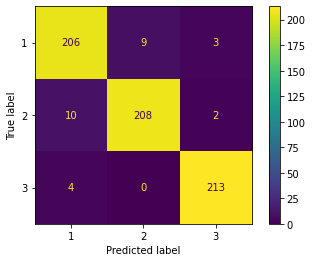

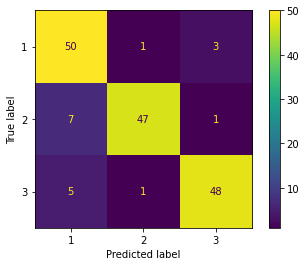

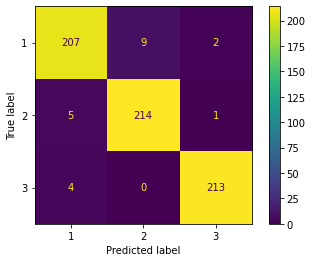

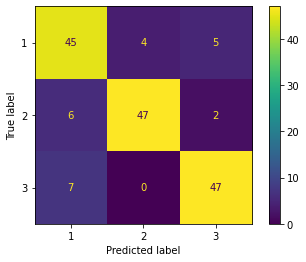

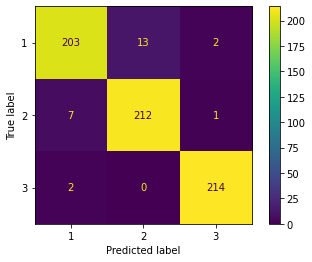

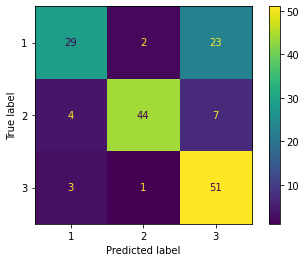

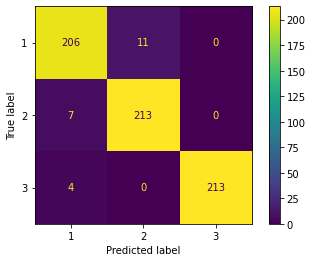

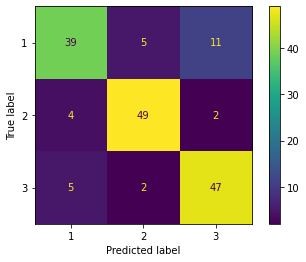

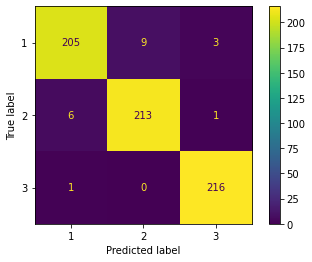

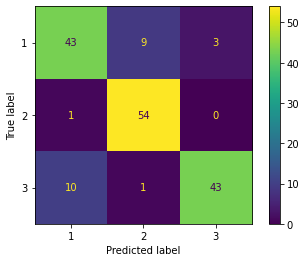

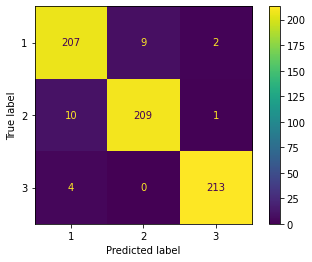

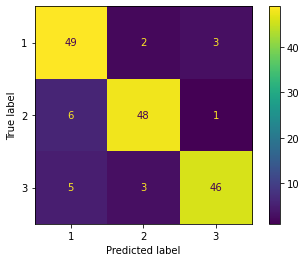

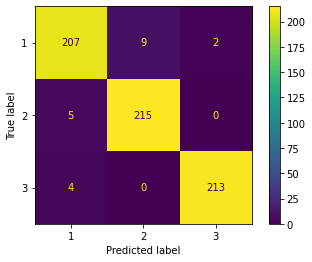

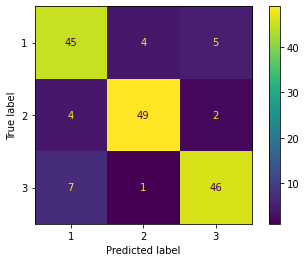

In [10]:

# C=10, Gamma=1
split2 = skf.split(X, Y)
accuracy_train,accuracy_test,sensitivity,precision,f1score=[],[],[],[],[]
sensitivity_tr,precision_tr,f1score_tr=[],[],[]
i = 1
print("One Against One (OAO) - Kernel: RBF (C=10, Gamma=1)")
for fold_no, (train_index2, test_index2) in enumerate(split2): 
    #Split Train-Test Data
    print("\nSPLIT NO. {}".format(fold_no+1))
    X_train2, X_test2 = X.iloc[train_index2], X.iloc[test_index2]
    Y_train2, Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
    #Building the model
    clfOAO2 = OneVsOneClassifier(SVC(kernel='rbf', C=10, gamma=1,
                                     probability=True,
                                     decision_function_shape='ovo')) 
    modelclfOAO2 = clfOAO2.fit(X_train2, Y_train2)
    #Accuracy of data training
    accuracy_train.append(modelclfOAO2.score(X_train2,Y_train2))
    #Accuracy the data testing
    y_pred_clfOAO2 = modelclfOAO2.predict(X_test2)
    accuracy_test.append(accuracy_score(Y_test2,y_pred_clfOAO2))
    #Confusion matrix in data training
    y_pred_clfOAO2_train = modelclfOAO2.predict(X_train2)
    cm_clfOAO2_tr=confusion_matrix(Y_train2,y_pred_clfOAO2_train)
    #Confusion matrix in data testing
    cm_clfOAO2=confusion_matrix(Y_test2,y_pred_clfOAO2)
    #Recall, Precision, F1Score in data training 
    recall_clfOAO2_tr =recall_score(Y_train2,y_pred_clfOAO2_train,average='macro') 
    f1score_clfOAO2_tr = f1_score(Y_train2,y_pred_clfOAO2_train,average='macro') 
    #Recall, Precision, F1Score in data testing
    recall_clfOAO2 = recall_score(Y_test2,y_pred_clfOAO2,average='macro')
    f1score_clfOAO2 = f1_score(Y_test2,y_pred_clfOAO2,average='macro')
    acc_clfOAO2_train=np.mean(accuracy_train)
    acc_clfOAO2_test=np.mean(accuracy_test) 
    sk_report_clfOAO2_tr = classification_report(digits=6,y_true=Y_train2, y_pred=y_pred_clfOAO2_train) 
    sk_report_clfOAO2 = classification_report(digits=6, y_true=Y_test2,y_pred=y_pred_clfOAO2) 
    cm_display2_train = ConfusionMatrixDisplay(cm_clfOAO2_tr,display_labels=['1','2','3']).plot() 
    cm_display2 = ConfusionMatrixDisplay(cm_clfOAO2,display_labels=['1','2','3']).plot() 
    y_test_bin = label_binarize(Y_test2, classes=np.unique(Y_train2))
    n_classes = y_test_bin.shape[1]
    # Compute predicted probabilities for each class
    y_score = modelclfOAO2.predict_proba(X_test2)
    y_score = np.array(y_score)
    # Compute ROC curve and ROC AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Plot ROC curve for each class
    plt.figure()
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
    # Plot micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=2,
             label='Micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]))
    # Add random guessing line
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    # Set plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    # Show the plot
    plt.show()
    
    print("*DATA TRAINING*")
    print("Confusion Matrix:\n",cm_clfOAO2_tr)
    print("Accuracy: ", acc_clfOAO2_train)
    print("macro Recall= ",recall_clfOAO2_tr)
    print("macro F1 Score= ", f1score_clfOAO2_tr)
    print("Classification Report:\n",sk_report_clfOAO2_tr)
    print("*DATA TESTING*")
    print("Confusion Matrix:\n",cm_clfOAO2)
    print("Accuracy for data test= ", acc_clfOAO2_test)
    print("macroo Recall= ",recall_clfOAO2)
    print("macro F1 Score= ", f1score_clfOAO2)
    print("Classification Report:\n",sk_report_clfOAO2)
    
    i= i+1 